Se procede a realizar la carga de librerías a utilizar

In [229]:
import pandas as pd
import numpy as np
import webbrowser as wb
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns 

from dateutil.parser import parse
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from pycaret.regression import *

# 1. Análisis preliminar

Se procede a realizar la carga del dataset de test para House pricing.

In [235]:
dataset = pd.read_csv("train.csv", sep = ",")

Se utilizará la función **ProfileReport** para obtener un reporte con análisis preliminar exhaustivo del dataset.

In [113]:
profile = ProfileReport(dataset, title = "Reporte preliminar")
#profile.to_notebook_iframe() # Se procede a excluir la visualización en el archivo debido a errores en visualización. En su lugar se procede con la exportación a un archivo HTML.
profile.to_file("reporte.html")
wb.open_new_tab('reporte.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

In [231]:
data_train = dataset.sample(frac=0.8, random_state=2023) 
data_test = dataset.drop(data_train.index) 
data_train.shape, data_test.shape

((1168, 81), (292, 81))

In [244]:
df = setup(data=data_train,
                target = 'SalePrice', # Variable objetivo
                session_id = 2023, # Asegurando la reproducibilidad
                numeric_imputation= 'knn', # Imputación numérica utilizando el acercamiento del KNN (K-Nearest Neighbor)
                max_encoding_ohe = 3, # Imputación categórica por One Hot Encoding
                categorical_imputation = 'mode', # Imputación categórica por Frecuency Encoding       
                transformation = True, # Se realiza la transformación de datos         
                outliers_threshold = 0.05, # Intervalo de parámetros que se descartarán para los outliers
                normalize = True, # Se acepta la normalización
                normalize_method = 'minmax', # Selección del métrodo de normalización,
                n_jobs = None, 
                log_experiment = True,
                experiment_name = 'SalePrice_house')

Se seleccionan los tres mejores modelos para el análisis basados en los resultados del RMSE. Se excluyen del cálculo la regresión lineal (*lr*) y Least Angle Regression (*lar*) debido a que sus resultados ___________________ .

In [242]:
best = compare_models(sort='RMSE', exclude=['lar', 'lr'], n_select=3) 

In [249]:
print(best)

[GradientBoostingRegressor(random_state=2023), ExtraTreesRegressor(random_state=2023), LGBMRegressor(random_state=2023)]


In [250]:
gbr = create_model('gbr')

In [251]:
lightgbm = create_model('lightgbm')

In [252]:
et = create_model('et')

1.1 Definición de características generales

In [187]:
# Dataset
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Se verifica la existencia de nulos

In [188]:
# Variables con Nulos
cols_Nan=[col for col in dataset.columns if(dataset[col].isnull().mean()>0)]
cols_Nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

Se valida que las columnas que tengan nulos menor al 5% de sus valores para no descartarlas en el análisis

In [189]:
cols_no_nan=[col for col in dataset.columns if (dataset[col].isnull().mean()<=0.05)]
print(cols_no_nan)
print(f"El total de columnas para el análisis es: {len(cols_no_nan)}")

['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']
El total de columnas para el análisis es: 70


In [190]:
# Se descartan las columnas con NaN mayores al 5%
dataset=dataset[cols_no_nan]

In [191]:
# Se descarta la columna 'Id' debido a que es una columna de enumeración
dataset=dataset.drop('Id', axis=1)

Se realizará un reporte utilizando la función **ProfileReport** con las variables a utilizar del dataset.

In [118]:
profile = ProfileReport(dataset, title = "Reporte variables a utilizar")
#profile.to_notebook_iframe() # Se procede a excluir la visualización en el archivo debido a errores en visualización. En su lugar se procede con la exportación a un archivo HTML.
profile.to_file("reporte_utilizacion.html")
wb.open_new_tab('reporte_utilizacion.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

# 2. Ingeniería de características

Se procede a realizar la Ingeniería de características para poder tratar los datos

In [192]:
def getDateColTypes(df):
    # Clasificar las variables del dataset
    categoricas = []
    continuas = []
    discretas = []
    fechas = []
    numericas = []

    # Obtener clasificación de variables
    for colName in dataset.columns:
            if np.issubdtype(dataset[colName].dtype, np.number):
                if len(dataset[colName].unique()) <= 30:
                    discretas.append(colName)
                    numericas.append(colName)
                else:
                    continuas.append(colName)
                    numericas.append(colName)
            else:
                try:
                    if dataset[colName].apply(lambda x: isinstance(parse(x), (datetime.datetime, datetime.date, datetime.time))).all():
                        fechas.append(colName)
                except Exception as e:
                    categoricas.append(colName)
    return categoricas, continuas, discretas, fechas, numericas



Se realiza la clasificación de variables

In [193]:
categoricas, continuas, discretas, fechas, numericas=getDateColTypes(dataset)

## 2.1 Codificación de variables categóricas

In [194]:
# Variables categóricas
categoricas

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

Se realiza la clasificación de variables categóricas según su proceso de codificación

In [195]:
# Obtener de las variables categoricas la cantidad de valores unicos no mayores a 3 ya que el resto de variables se tratarán con Frecuency Encoding
print("Variables para One Hot Encoding:")
ohe_var=[]
for var in categoricas:
    unicos = dataset[var].nunique()
    if unicos <=3:
        print(f'{var}: {unicos}')
        # Agrega las variables tratadas a una lista
        ohe_var.append(var)

print("")
print("Variables para Frecuency Encoding:")
freq_var = []
for var in categoricas:
    unicos = dataset[var].nunique()
    if unicos >3:
        print(f'{var}: {unicos}')
        # Agrega las variables tratadas a una lista
        freq_var.append(var)

Variables para One Hot Encoding:
Street: 2
Utilities: 2
LandSlope: 3
CentralAir: 2
PavedDrive: 3

Variables para Frecuency Encoding:
MSZoning: 5
LotShape: 4
LandContour: 4
LotConfig: 5
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 4
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
BsmtFinType2: 6
Heating: 6
HeatingQC: 5
Electrical: 5
KitchenQual: 4
Functional: 7
SaleType: 9
SaleCondition: 6


### 2.1.1 One Hot Encoding

Se procede a realizar la codificación por medio de One Hot Encoding

In [196]:
for var in ohe_var:
    unicos = dataset[var].nunique()
    if unicos <= 3:
        # Realiza One Hot Encoding
        dataset_cod = pd.get_dummies(dataset[var], prefix=f'ohe_{var}')
        
        # Agrega las nuevas columnas al DataFrame original
        dataset = pd.concat([dataset, dataset_cod], axis=1)
        
        # Elimina la variable original
        dataset = dataset.drop(var, axis=1)

In [197]:
df=dataset.copy()

### 2.1.2 Frecuency Encoding

Se procede a realizar la codificación por medio de Frecuency Encoding

In [198]:
for var in freq_var:
    unicos = dataset[var].nunique()
    if unicos > 3:
        # Calcula la frecuencia de cada valor en la variable
        frequency_map = dataset[var].value_counts(normalize=True).to_dict()
        
        # Reemplaza los valores en la variable original con sus frecuencias
        dataset[var] = dataset[var].map(frequency_map)
        
        # Renombra la variable para indicar Frequency Encoding
        dataset = dataset.rename(columns={var: f'freq_{var}'})

## 2.2 Transformación de variables

In [199]:
# Obtener nuevamente tipos de variables
categoricas, continuas, discretas, fechas, numericas=getDateColTypes(dataset)

In [200]:
print(f'categoricas: {categoricas}')
print(f'continuas: {continuas}')
print(f'discretas: {discretas}')
print(f'fechas: {fechas}')
print(f'numericas: {numericas}')

categoricas: []
continuas: ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
discretas: ['MSSubClass', 'freq_MSZoning', 'freq_LotShape', 'freq_LandContour', 'freq_LotConfig', 'freq_Neighborhood', 'freq_Condition1', 'freq_Condition2', 'freq_BldgType', 'freq_HouseStyle', 'OverallQual', 'OverallCond', 'freq_RoofStyle', 'freq_RoofMatl', 'freq_Exterior1st', 'freq_Exterior2nd', 'freq_MasVnrType', 'freq_ExterQual', 'freq_ExterCond', 'freq_Foundation', 'freq_BsmtQual', 'freq_BsmtCond', 'freq_BsmtExposure', 'freq_BsmtFinType1', 'freq_BsmtFinType2', 'freq_Heating', 'freq_HeatingQC', 'freq_Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'freq_KitchenQual', 'TotRmsAbvGrd', 'freq_Functional', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'Mi

In [201]:
# Variables Discretas
dataset[discretas].describe()

MSSubClass  freq_MSZoning  freq_LotShape  freq_LandContour  \
count  1460.000000    1460.000000    1460.000000       1460.000000   
mean     56.897260       0.645950       0.512133          0.809948   
std      42.300571       0.276022       0.168836          0.261121   
min      20.000000       0.006849       0.006849          0.024658   
25%      20.000000       0.788356       0.331507          0.897945   
50%      50.000000       0.788356       0.633562          0.897945   
75%      70.000000       0.788356       0.633562          0.897945   
max     190.000000       0.788356       0.633562          0.897945   

       freq_LotConfig  freq_Neighborhood  freq_Condition1  freq_Condition2  \
count     1460.000000        1460.000000      1460.000000      1460.000000   
mean         0.556828           0.068343         0.749538         0.979582   
std          0.265023           0.043728         0.285007         0.099602   
min          0.002740           0.001370         0.001370         0.000685   
25%          0.180137           0.034932         0.863014         0.989726   
50%          0.720548           0.054110         0.863014         0.989726   
75%          0.720548           0.102740         0.863014         0.989726   
max          0.720548           0.154110         0.863014         0.989726   

       freq_BldgType  freq_HouseStyle  ...  ohe_Utilities_AllPub  \
count    1460.000000      1460.000000  ...           1460.000000   
mean        0.706938         0.354096  ...              0.999315   
std         0.290388         0.164881  ...              0.026171   
min         0.021233         0.005479  ...              0.000000   
25%         0.835616         0.304795  ...              1.000000   
50%         0.835616         0.304795  ...              1.000000   
75%         0.835616         0.497260  ...              1.000000   
max         0.835616         0.497260  ...              1.000000   

       ohe_Utilities_NoSeWa  ohe_LandSlope_Gtl  ohe_LandSlope_Mod  \
count           1460.000000        1460.000000        1460.000000   
mean               0.000685           0.946575           0.044521   
std                0.026171           0.224956           0.206319   
min                0.000000           0.000000           0.000000   
25%                0.000000           1.000000           0.000000   
50%                0.000000           1.000000           0.000000   
75%                0.000000           1.000000           0.000000   
max                1.000000           1.000000           1.000000   

       ohe_LandSlope_Sev  ohe_CentralAir_N  ohe_CentralAir_Y  \
count        1460.000000       1460.000000       1460.000000   
mean            0.008904          0.065068          0.934932   
std             0.093973          0.246731          0.246731   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          1.000000   
50%             0.000000          0.000000          1.000000   
75%             0.000000          0.000000          1.000000   
max             1.000000          1.000000          1.000000   

       ohe_PavedDrive_N  ohe_PavedDrive_P  ohe_PavedDrive_Y  
count       1460.000000       1460.000000       1460.000000  
mean           0.061644          0.020548          0.917808  
std            0.240590          0.141914          0.274751  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          1.000000  
50%            0.000000          0.000000          1.000000  
75%            0.000000          0.000000          1.000000  
max            1.000000          1.000000          1.000000  

[8 rows x 59 columns]

In [202]:
# Variables Contínuas
dataset[continuas].describe()

LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count    1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean    10516.828082  1971.267808   1984.865753   103.685262   443.639726   
std      9981.264932    30.202904     20.645407   181.066207   456.098091   
min      1300.000000  1872.000000   1950.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   1967.000000     0.000000     0.000000   
50%      9478.500000  1973.000000   1994.000000     0.000000   383.500000   
75%     11601.500000  2000.000000   2004.000000   166.000000   712.250000   
max    215245.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

       ScreenPorch      SalePrice  
count  1460.000000    1460.000000  
mean     15.060959  180921.195890  
std      55.757415   79442.502883  
min       0.000000   34900.000000  
25%       0.000000  129975.000000  
50%       0.000000  163000.000000  
75%       0.000000  214000.000000  
max     480.000000  755000.000000

In [203]:
# Variables Numéricas
dataset[numericas].describe()

MSSubClass  freq_MSZoning        LotArea  freq_LotShape  \
count  1460.000000    1460.000000    1460.000000    1460.000000   
mean     56.897260       0.645950   10516.828082       0.512133   
std      42.300571       0.276022    9981.264932       0.168836   
min      20.000000       0.006849    1300.000000       0.006849   
25%      20.000000       0.788356    7553.500000       0.331507   
50%      50.000000       0.788356    9478.500000       0.633562   
75%      70.000000       0.788356   11601.500000       0.633562   
max     190.000000       0.788356  215245.000000       0.633562   

       freq_LandContour  freq_LotConfig  freq_Neighborhood  freq_Condition1  \
count       1460.000000     1460.000000        1460.000000      1460.000000   
mean           0.809948        0.556828           0.068343         0.749538   
std            0.261121        0.265023           0.043728         0.285007   
min            0.024658        0.002740           0.001370         0.001370   
25%            0.897945        0.180137           0.034932         0.863014   
50%            0.897945        0.720548           0.054110         0.863014   
75%            0.897945        0.720548           0.102740         0.863014   
max            0.897945        0.720548           0.154110         0.863014   

       freq_Condition2  freq_BldgType  ...  ohe_Utilities_AllPub  \
count      1460.000000    1460.000000  ...           1460.000000   
mean          0.979582       0.706938  ...              0.999315   
std           0.099602       0.290388  ...              0.026171   
min           0.000685       0.021233  ...              0.000000   
25%           0.989726       0.835616  ...              1.000000   
50%           0.989726       0.835616  ...              1.000000   
75%           0.989726       0.835616  ...              1.000000   
max           0.989726       0.835616  ...              1.000000   

       ohe_Utilities_NoSeWa  ohe_LandSlope_Gtl  ohe_LandSlope_Mod  \
count           1460.000000        1460.000000        1460.000000   
mean               0.000685           0.946575           0.044521   
std                0.026171           0.224956           0.206319   
min                0.000000           0.000000           0.000000   
25%                0.000000           1.000000           0.000000   
50%                0.000000           1.000000           0.000000   
75%                0.000000           1.000000           0.000000   
max                1.000000           1.000000           1.000000   

       ohe_LandSlope_Sev  ohe_CentralAir_N  ohe_CentralAir_Y  \
count        1460.000000       1460.000000       1460.000000   
mean            0.008904          0.065068          0.934932   
std             0.093973          0.246731          0.246731   
min             0.000000          0.000000          0.000000   
25%             0.000000          0.000000          1.000000   
50%             0.000000          0.000000          1.000000   
75%             0.000000          0.000000          1.000000   
max             1.000000          1.000000          1.000000   

       ohe_PavedDrive_N  ohe_PavedDrive_P  ohe_PavedDrive_Y  
count       1460.000000       1460.000000       1460.000000  
mean           0.061644          0.020548          0.917808  
std            0.240590          0.141914          0.274751  
min            0.000000          0.000000          0.000000  
25%            0.000000          0.000000          1.000000  
50%            0.000000          0.000000          1.000000  
75%            0.000000          0.000000          1.000000  
max            1.000000          1.000000          1.000000  

[8 rows x 76 columns]

In [204]:
# Buscar normalidad de las variables continuas de forma grafica

def plot_density_qq(dataset,var):
    '''Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad'''
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    dataset[var].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(dataset[var],dist='norm',plot=plt)

    plt.show()

LotArea


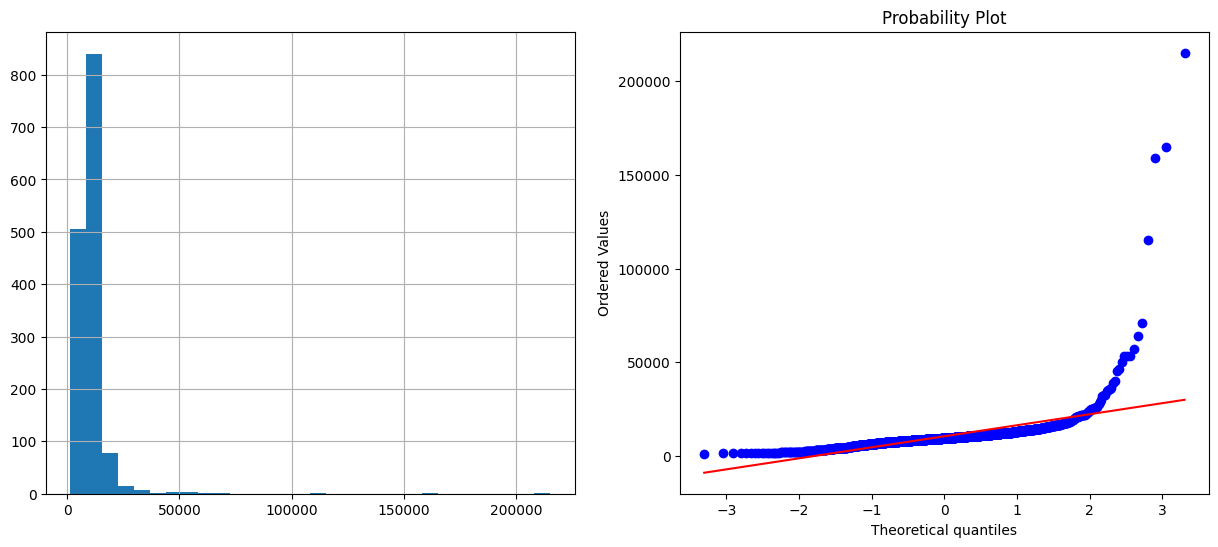

YearBuilt


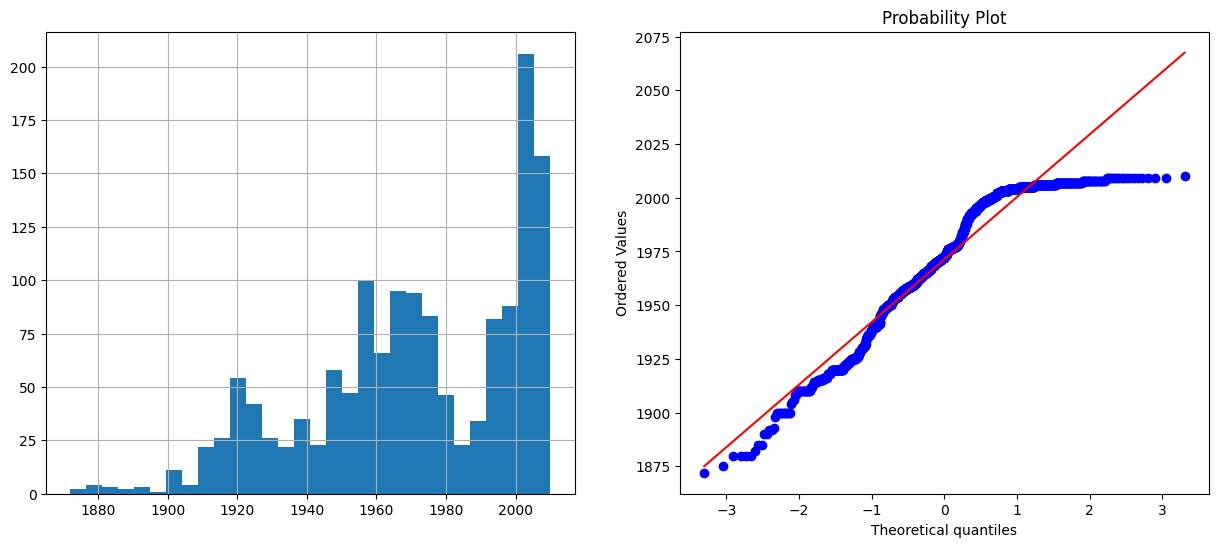

YearRemodAdd


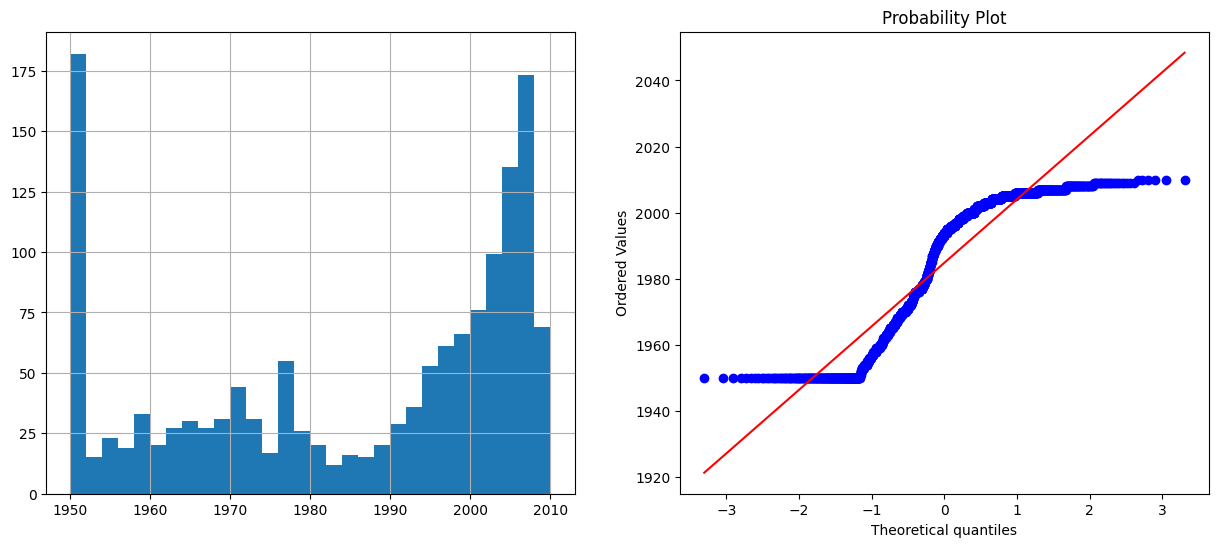

MasVnrArea


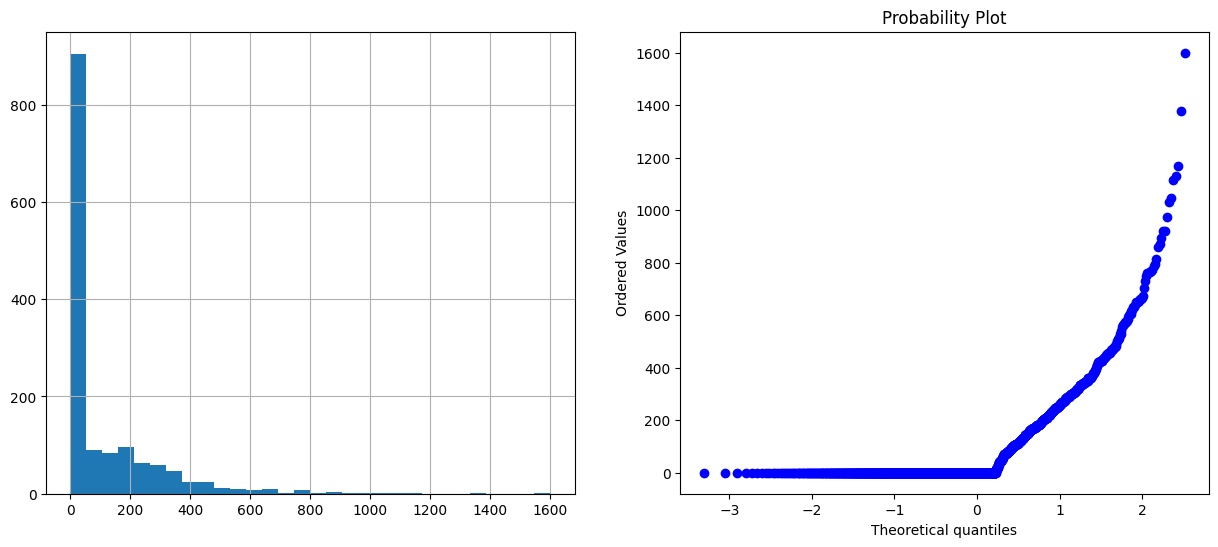

BsmtFinSF1


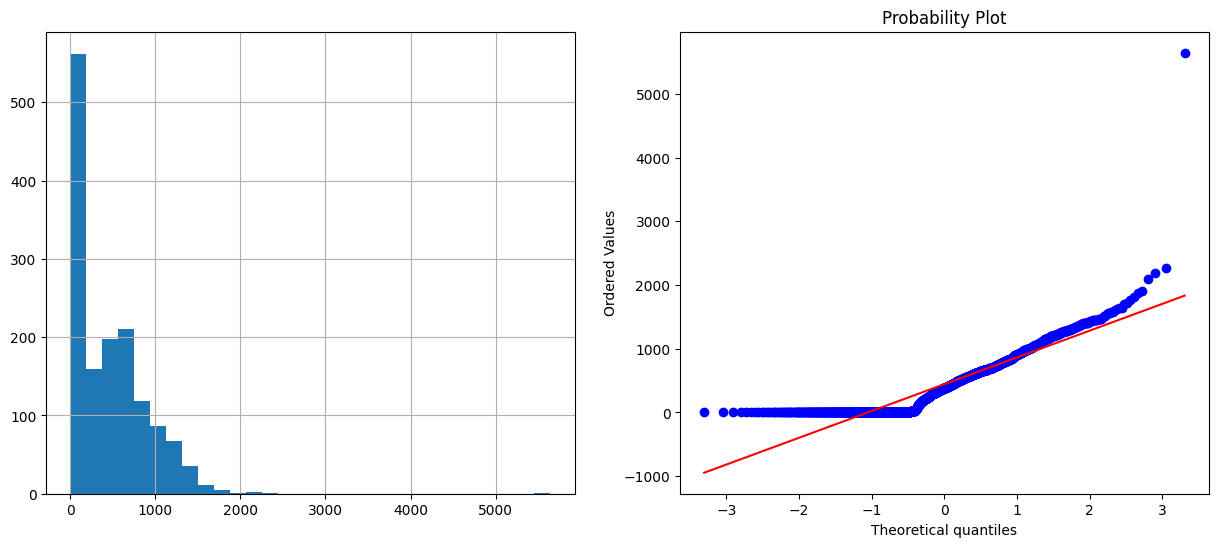

BsmtFinSF2


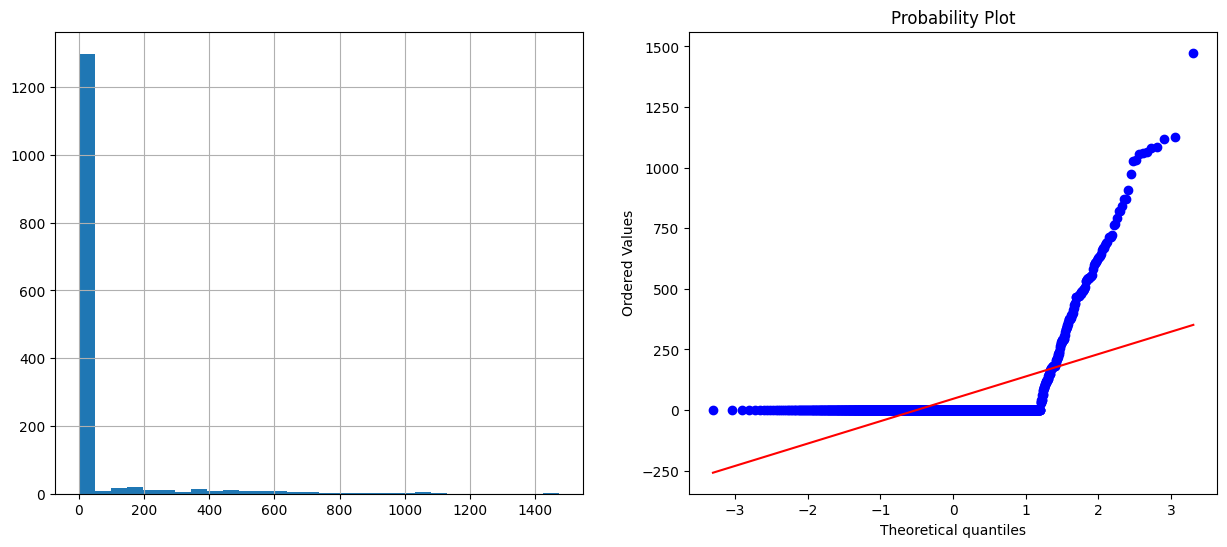

BsmtUnfSF


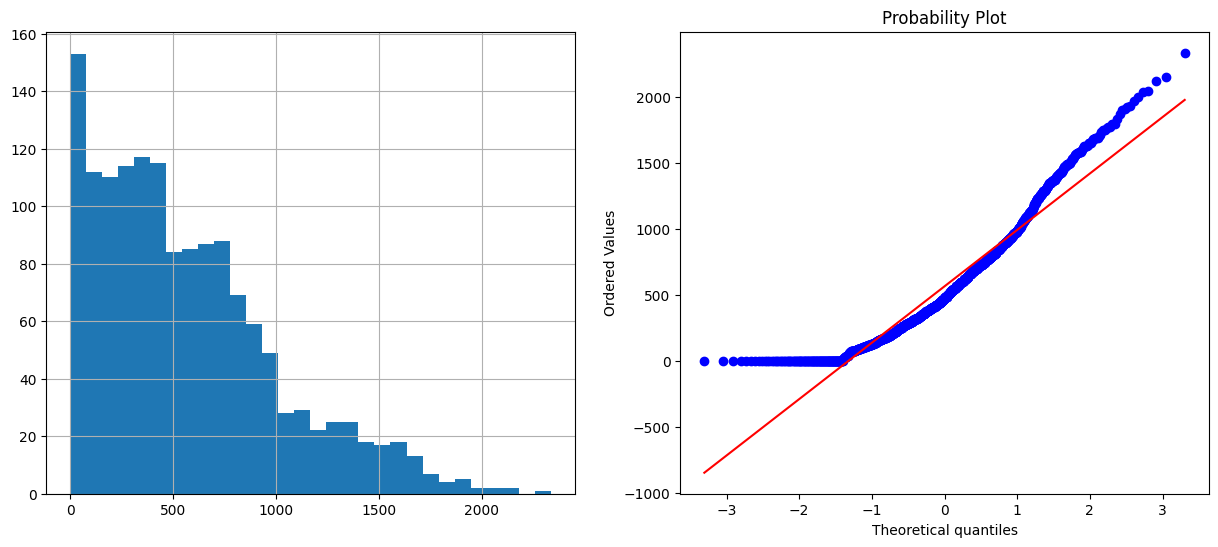

TotalBsmtSF


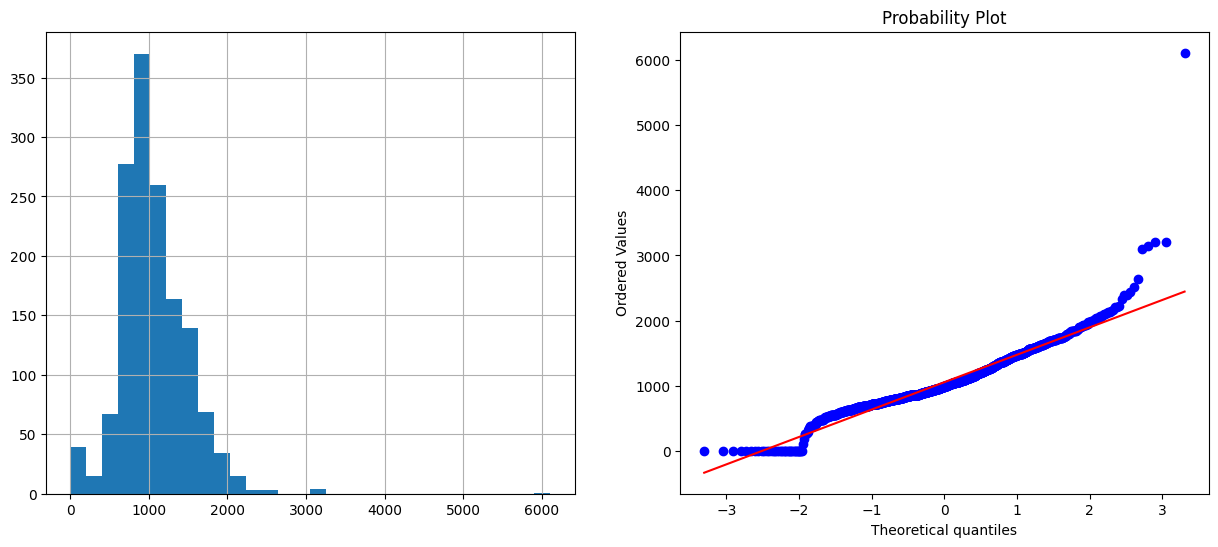

1stFlrSF


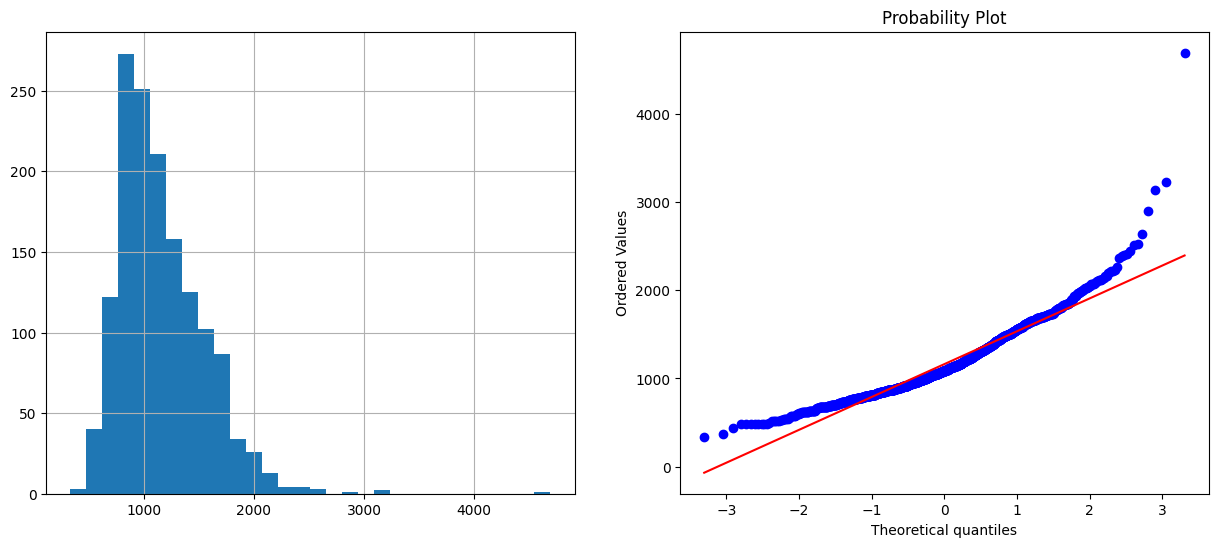

2ndFlrSF


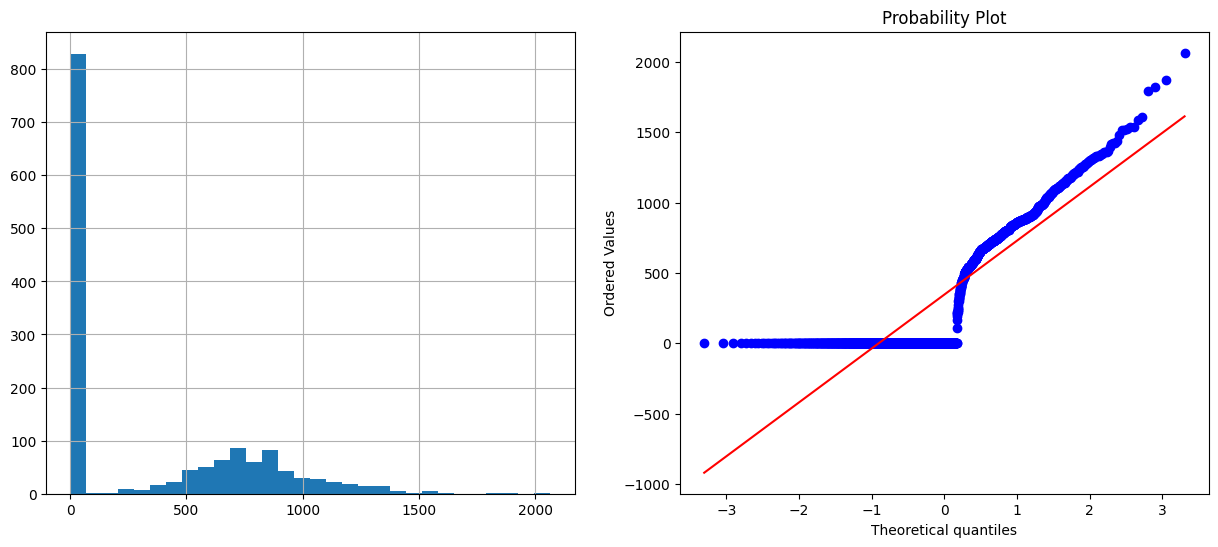

GrLivArea


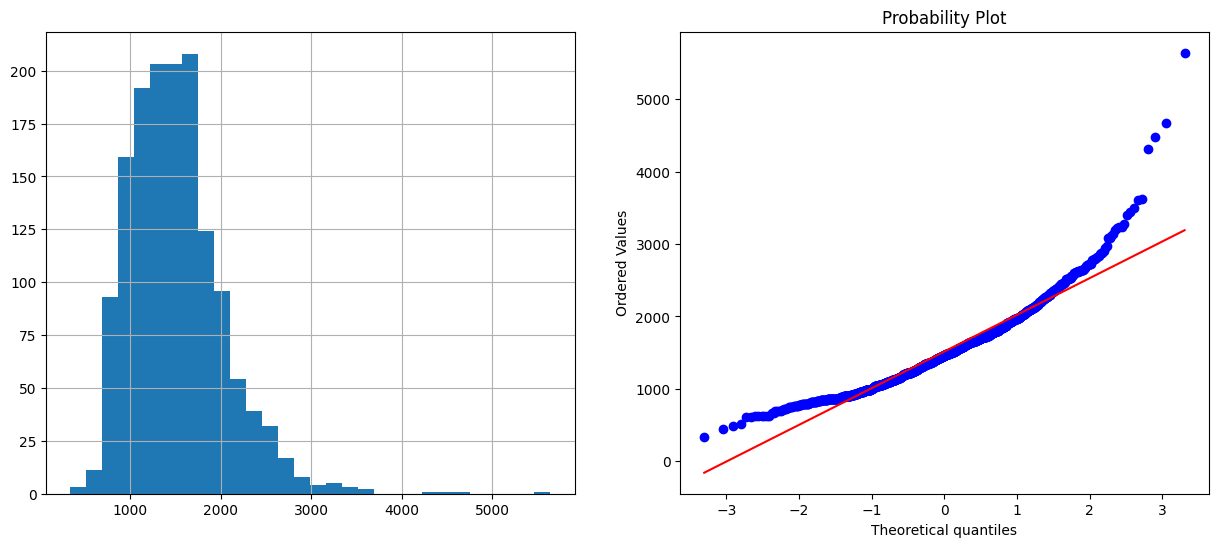

GarageArea


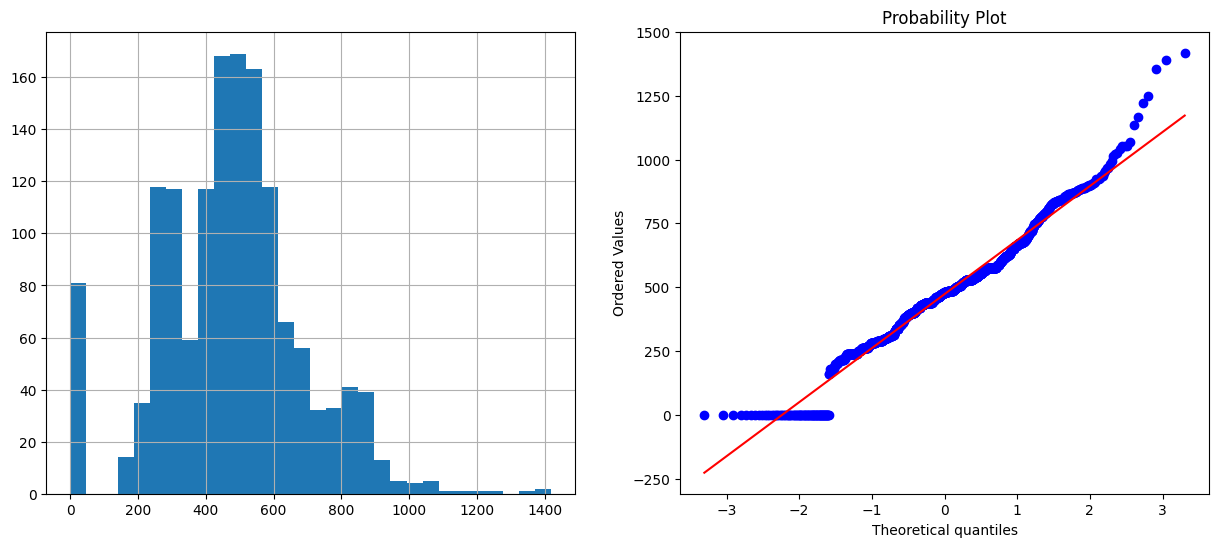

WoodDeckSF


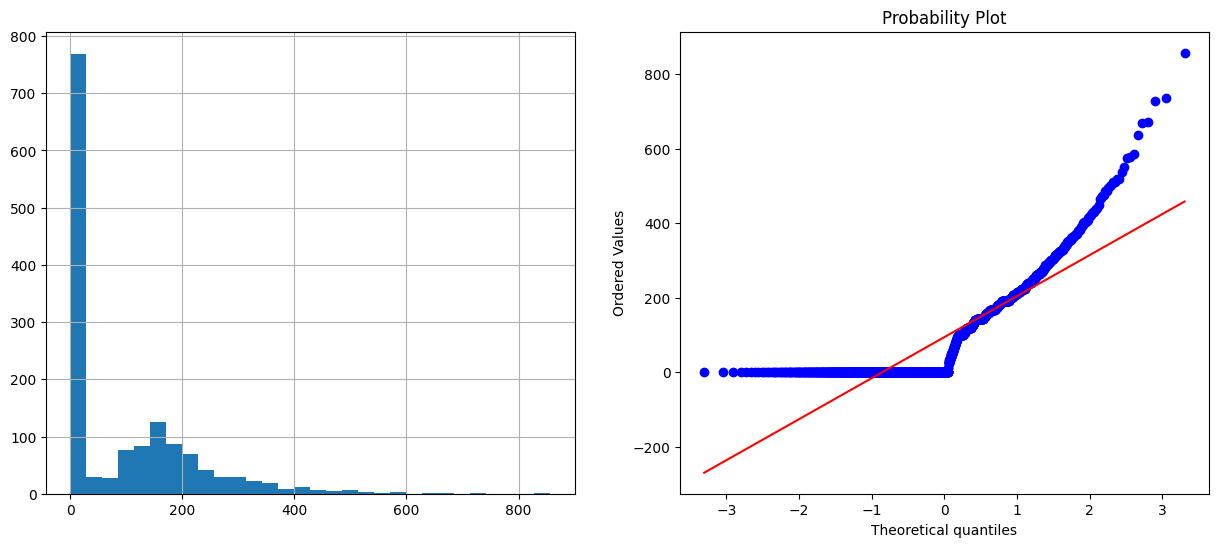

OpenPorchSF


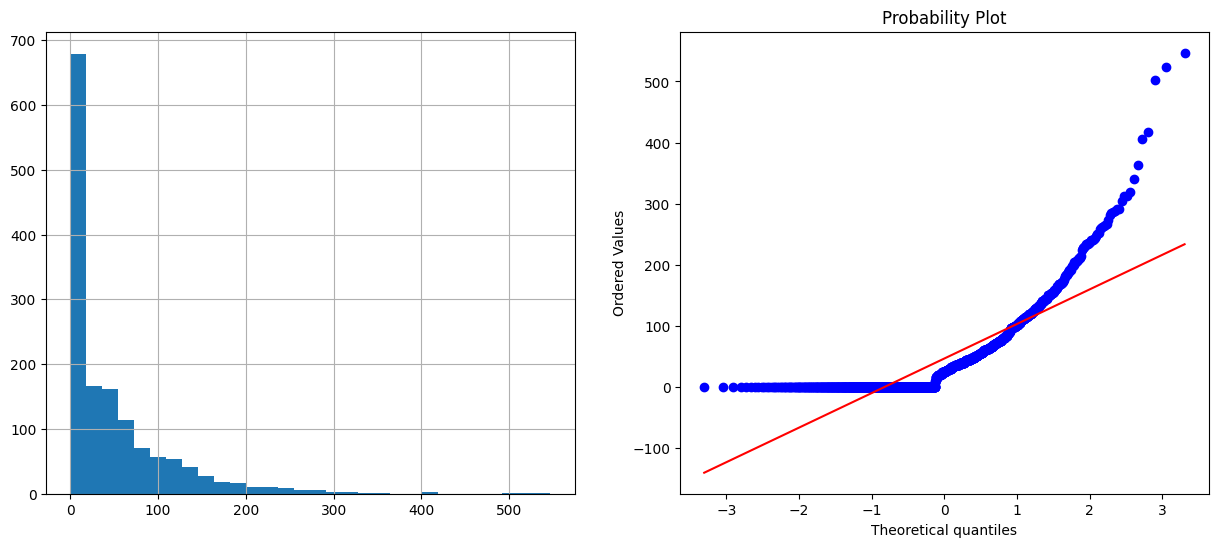

EnclosedPorch


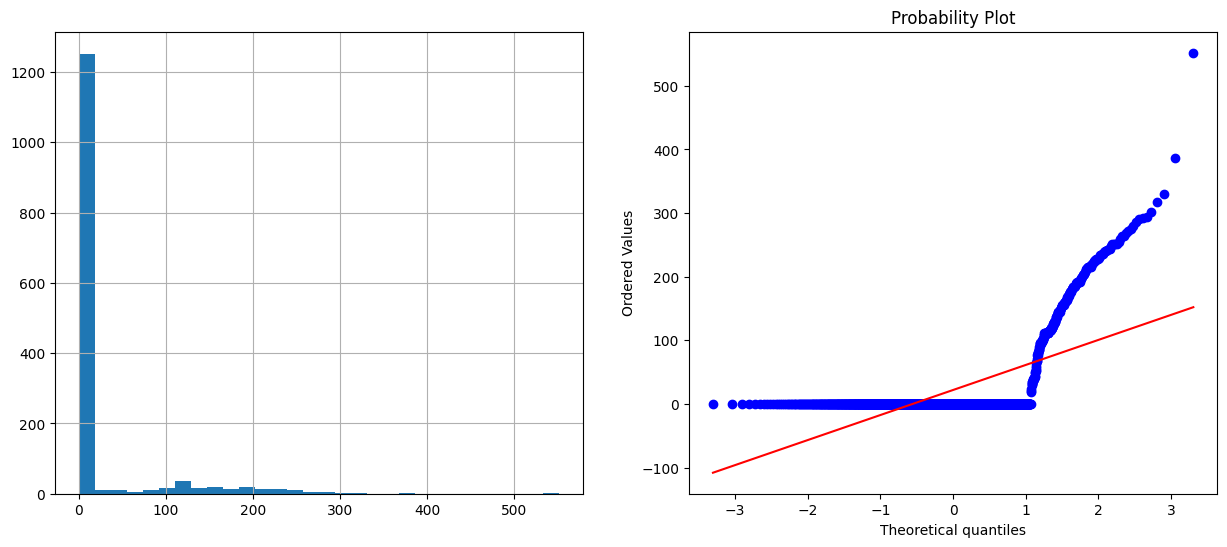

ScreenPorch


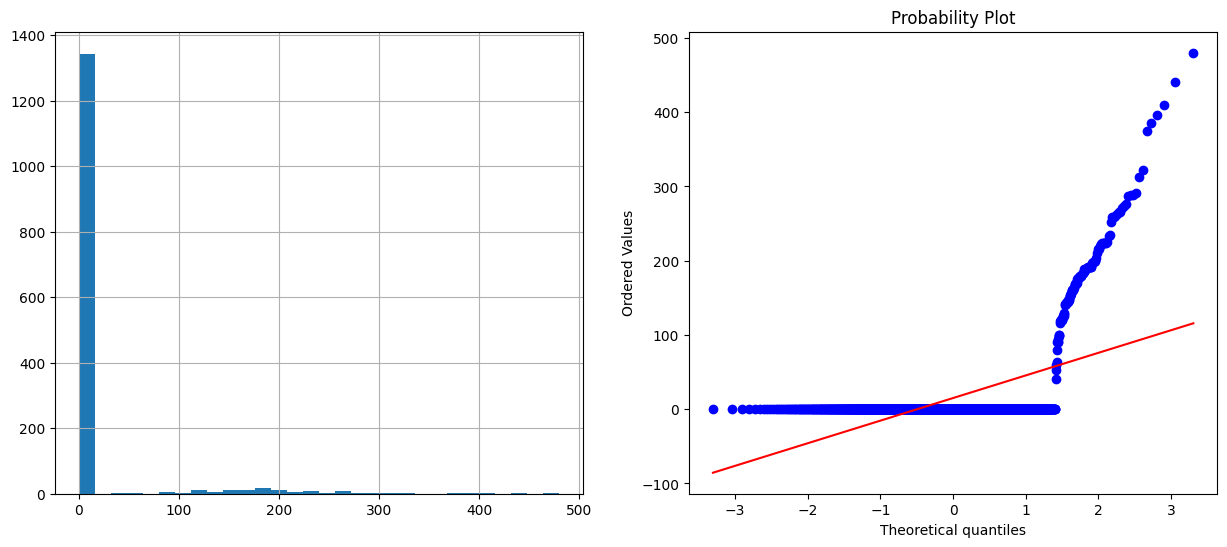

SalePrice


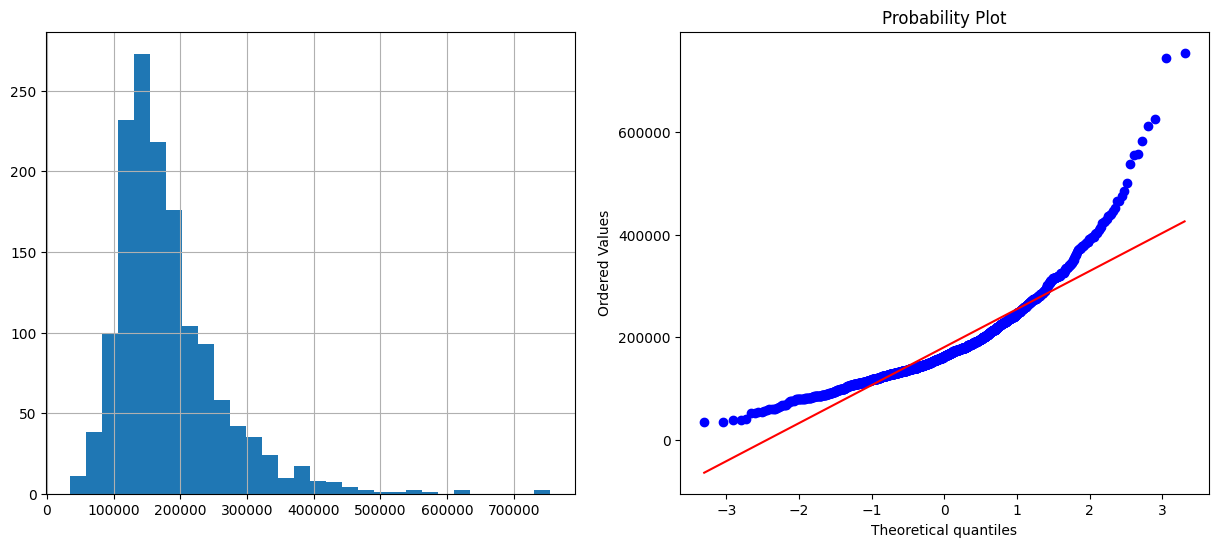

In [205]:
for var in continuas:
    print(var)
    plot_density_qq(dataset,var)

Se definen las variables a transformar utilizando la prueba de shapiro para determinar la normalidad de las variables

In [206]:
# Buscar la normalidad de las variables continuas con Shapiro

for col in continuas:
    shapiro_test=stats.shapiro(dataset[col])
    if (shapiro_test.pvalue<0.05):
        print(f'{col}: No es Normal ')
    else:
        print(f'{col}: Es Normal ')

LotArea: No es Normal 
YearBuilt: No es Normal 
YearRemodAdd: No es Normal 
MasVnrArea: Es Normal 
BsmtFinSF1: No es Normal 
BsmtFinSF2: No es Normal 
BsmtUnfSF: No es Normal 
TotalBsmtSF: No es Normal 
1stFlrSF: No es Normal 
2ndFlrSF: No es Normal 
GrLivArea: No es Normal 
GarageArea: No es Normal 
WoodDeckSF: No es Normal 
OpenPorchSF: No es Normal 
EnclosedPorch: No es Normal 
ScreenPorch: No es Normal 
SalePrice: No es Normal 


In [207]:
var_tra_log = ['BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

In [208]:
for col in dataset[var_tra_log]:
    if (dataset[col].isnull().mean()>0):
        print(col)

In [216]:
for col in var_tra_log:
    dataset[col + '_transformada'], lambda_value = stats.yeojohnson(dataset[col] + 1)  # Se añade 1 para manejar valores no positivos

LotArea


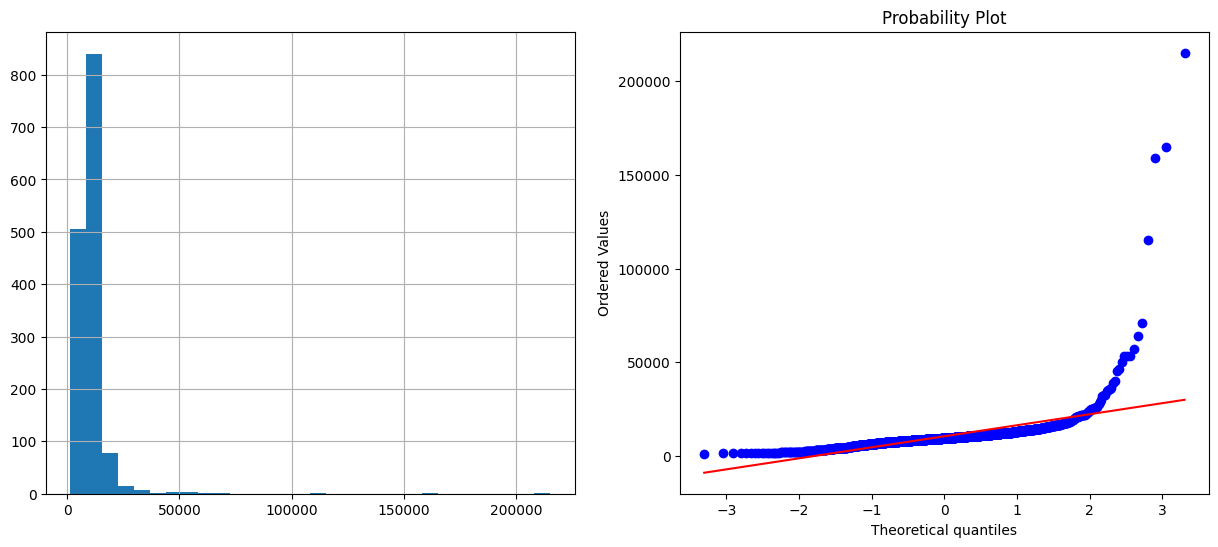

YearBuilt


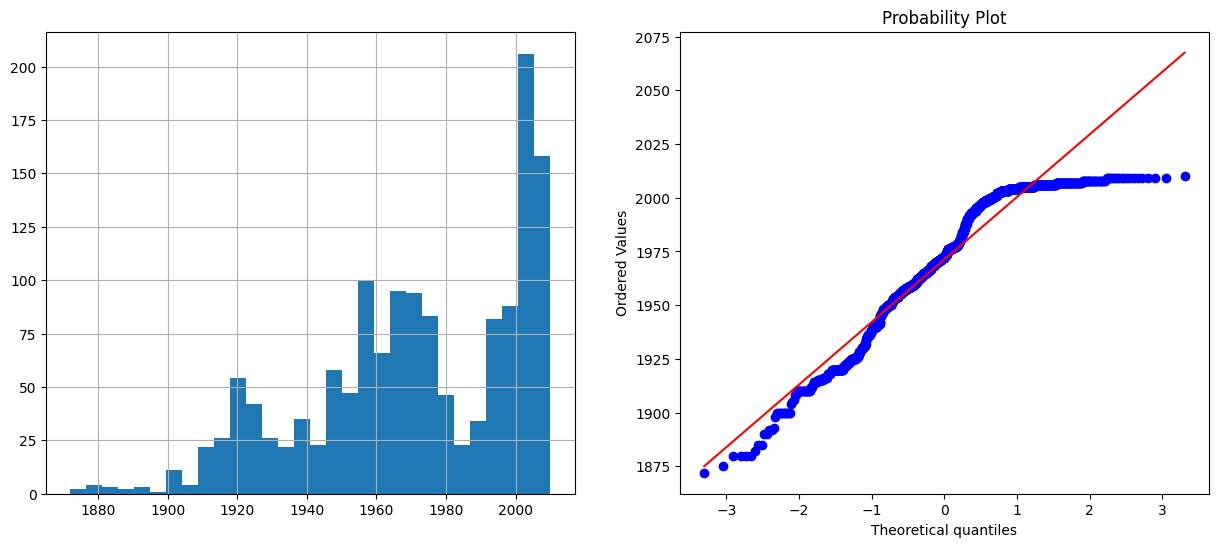

YearRemodAdd


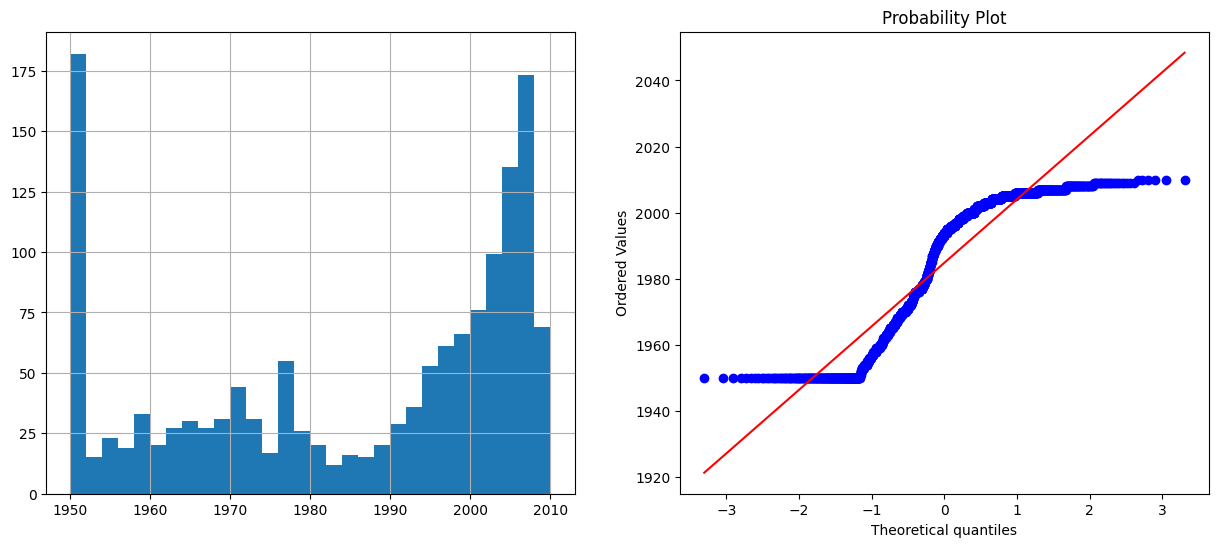

MasVnrArea


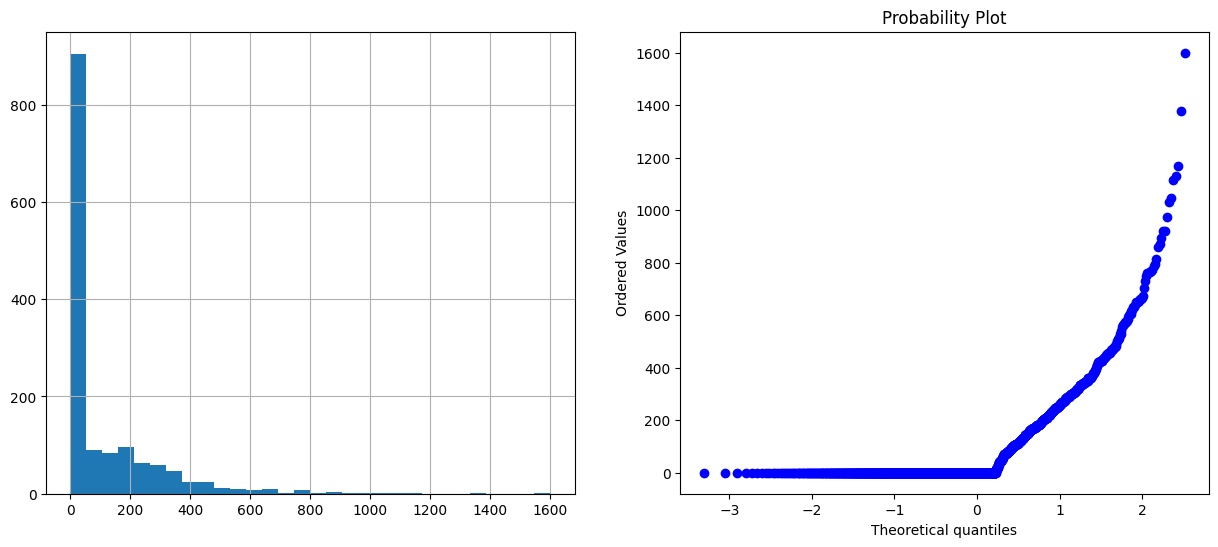

BsmtFinSF1


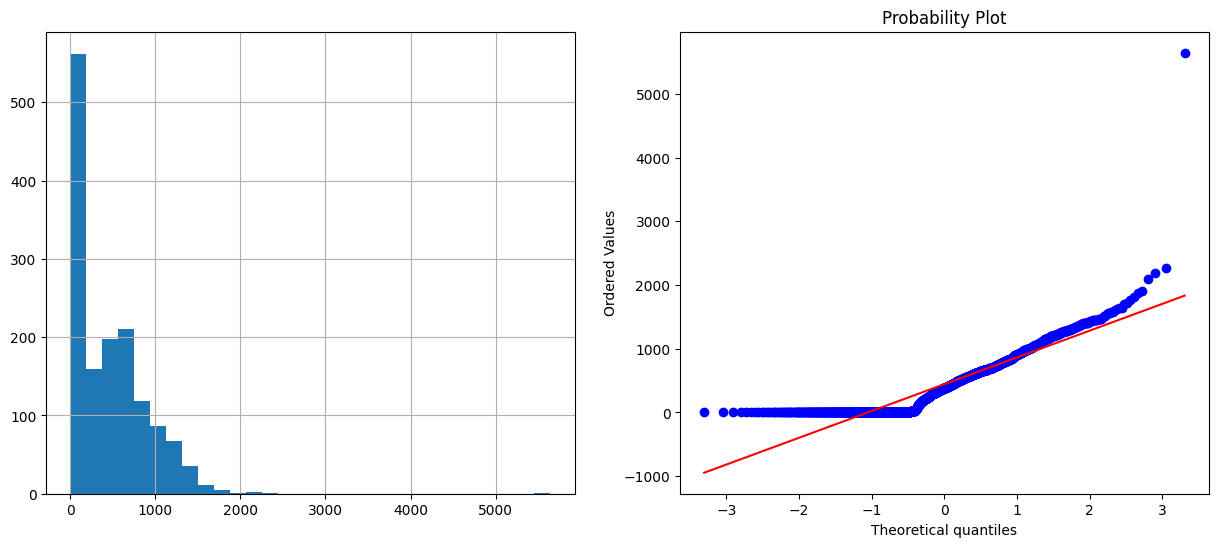

BsmtFinSF2


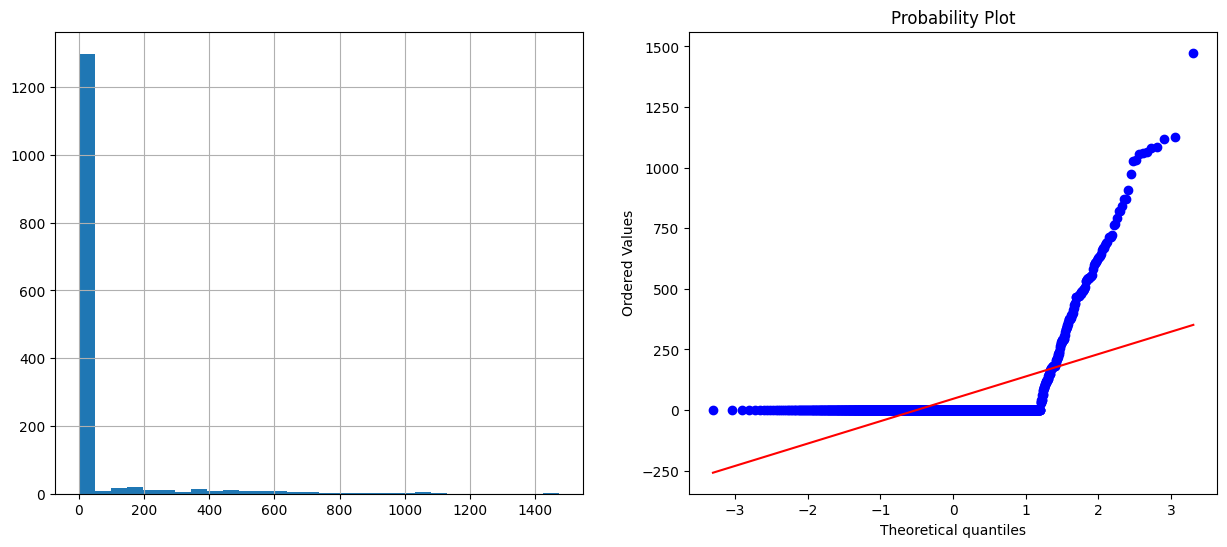

BsmtUnfSF


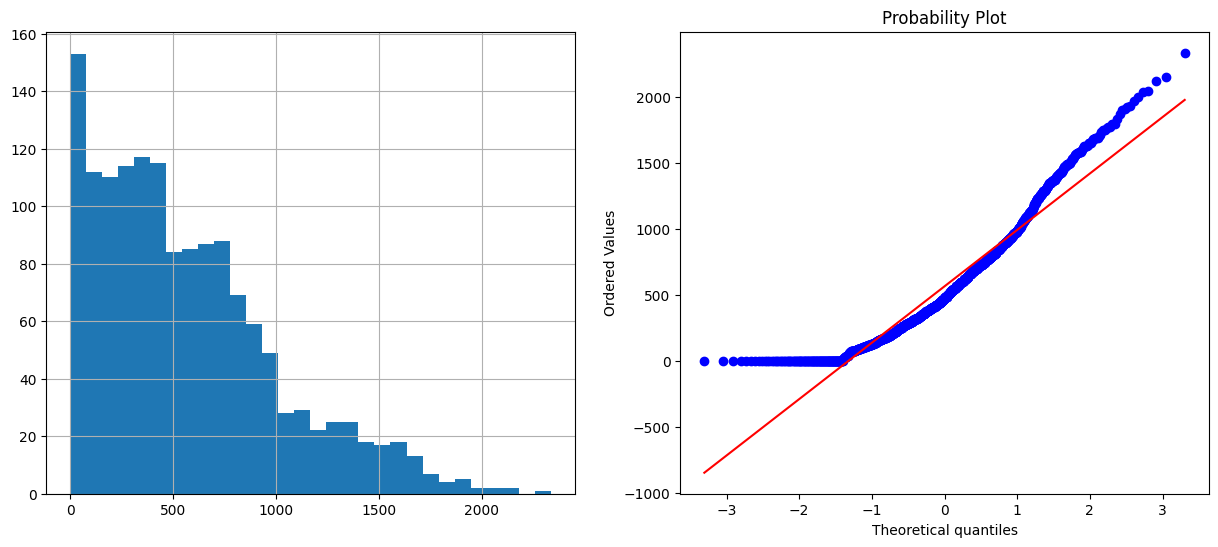

TotalBsmtSF


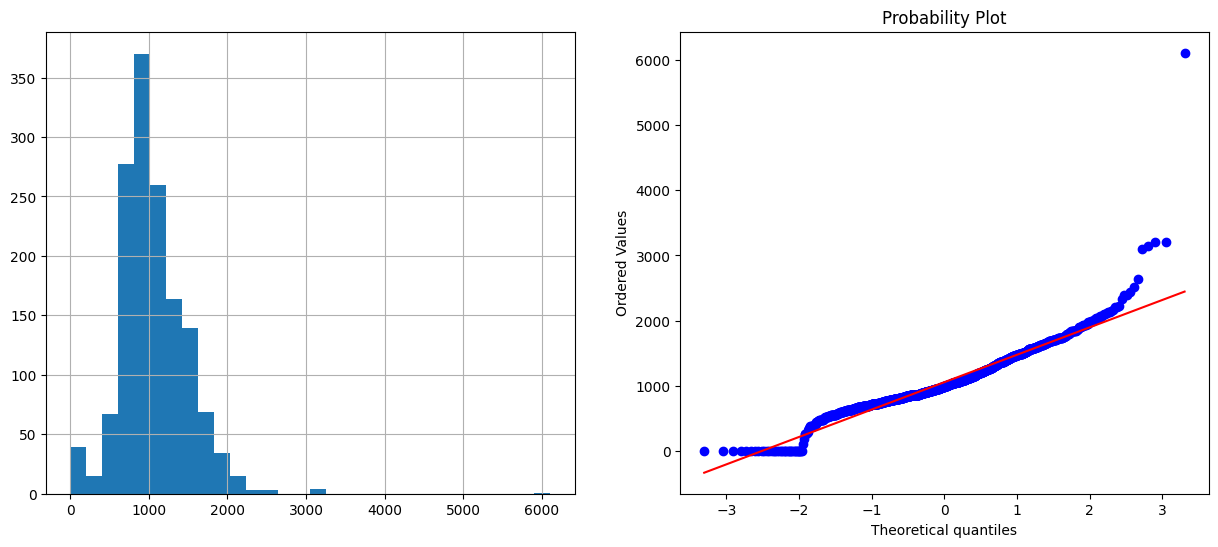

1stFlrSF


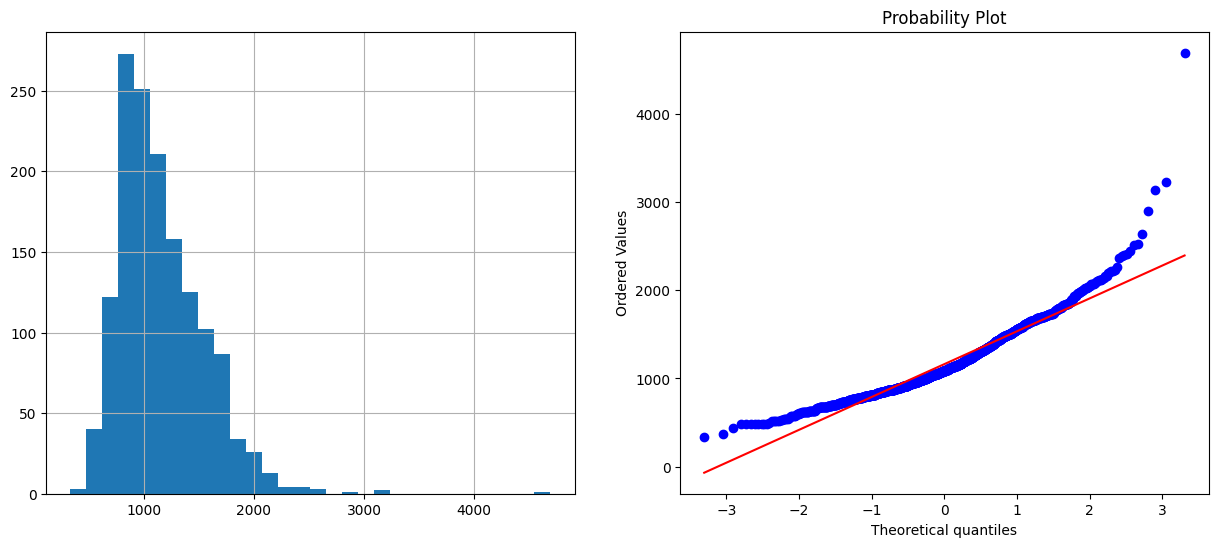

2ndFlrSF


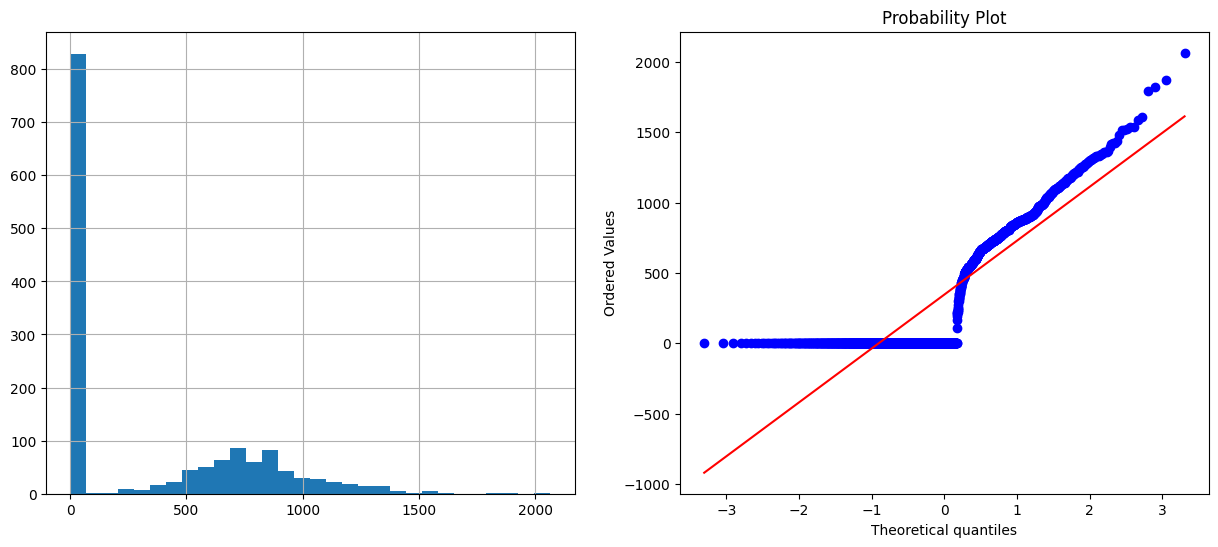

GrLivArea


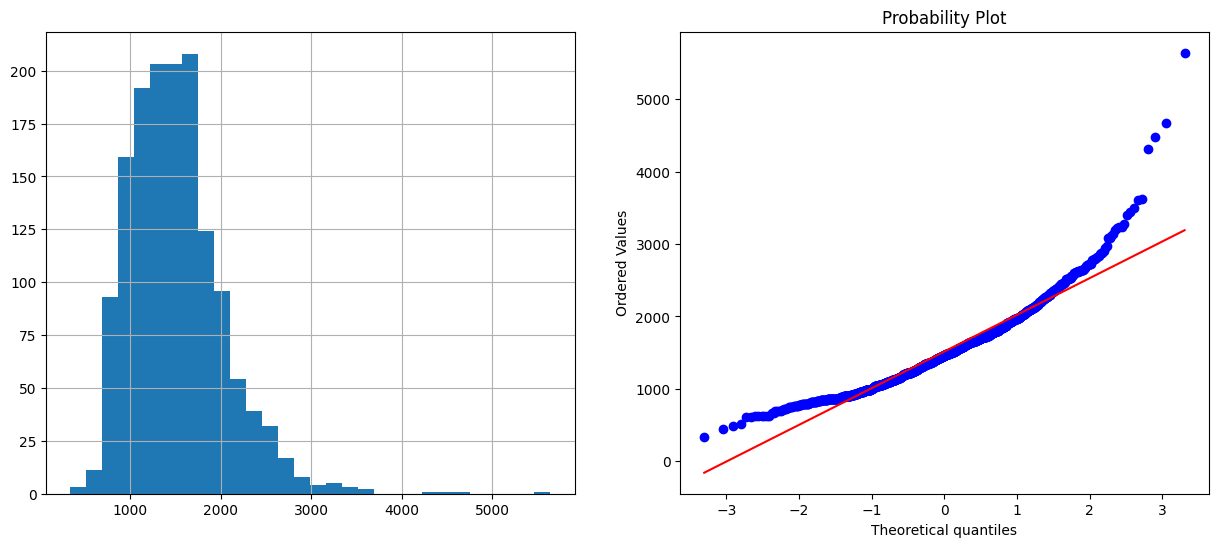

GarageArea


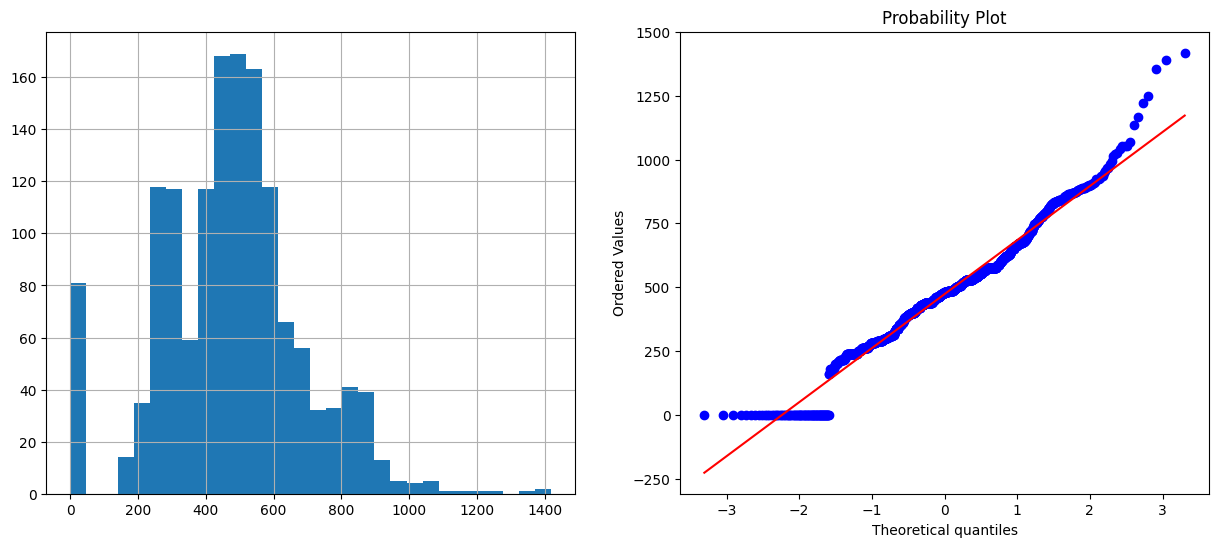

WoodDeckSF


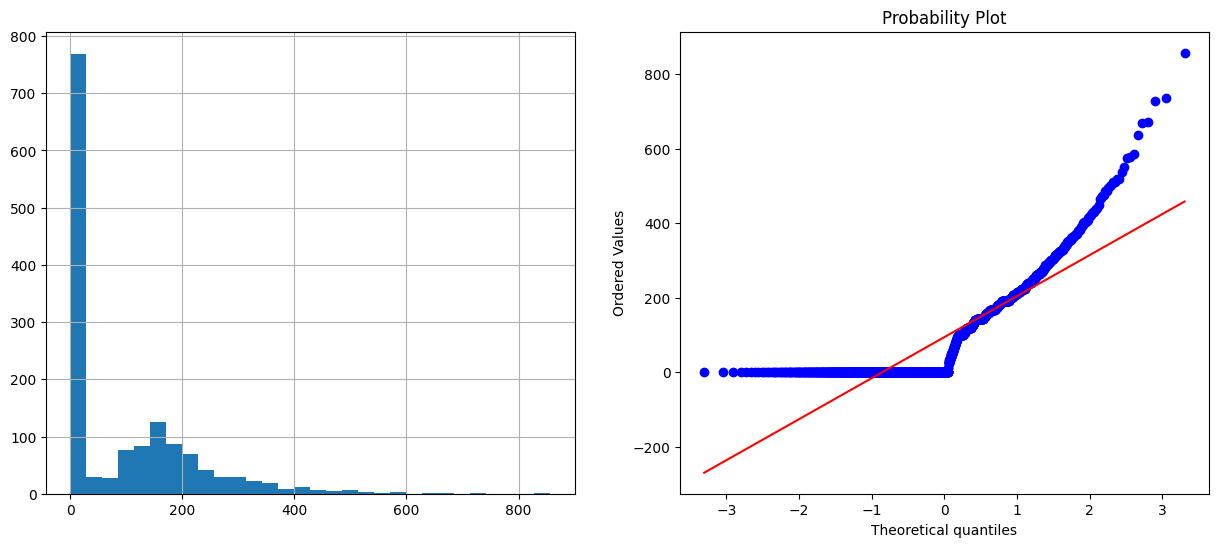

OpenPorchSF


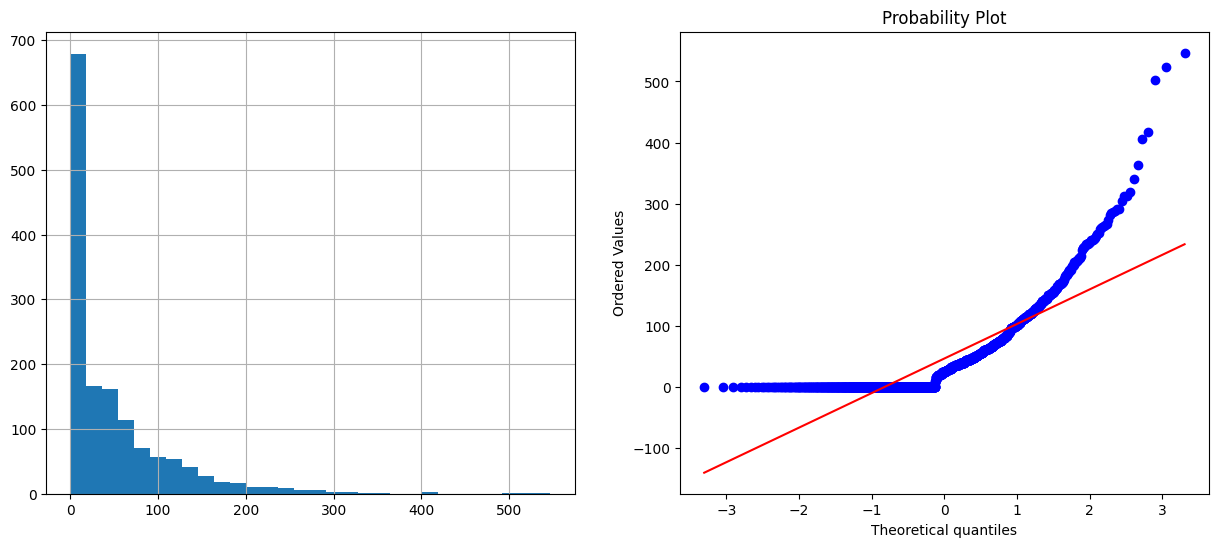

EnclosedPorch


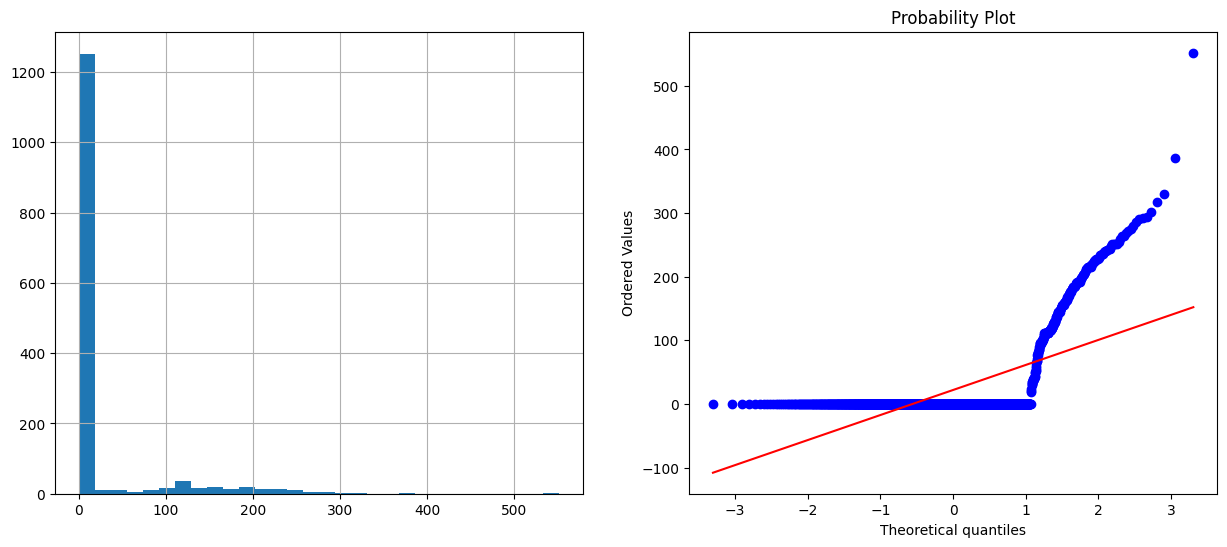

ScreenPorch


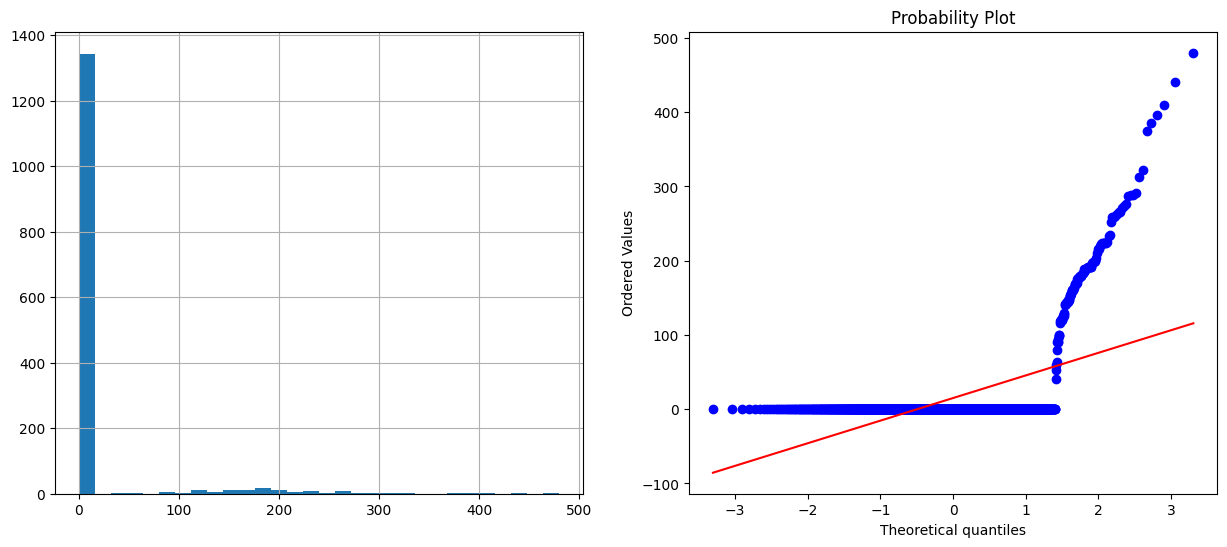

SalePrice


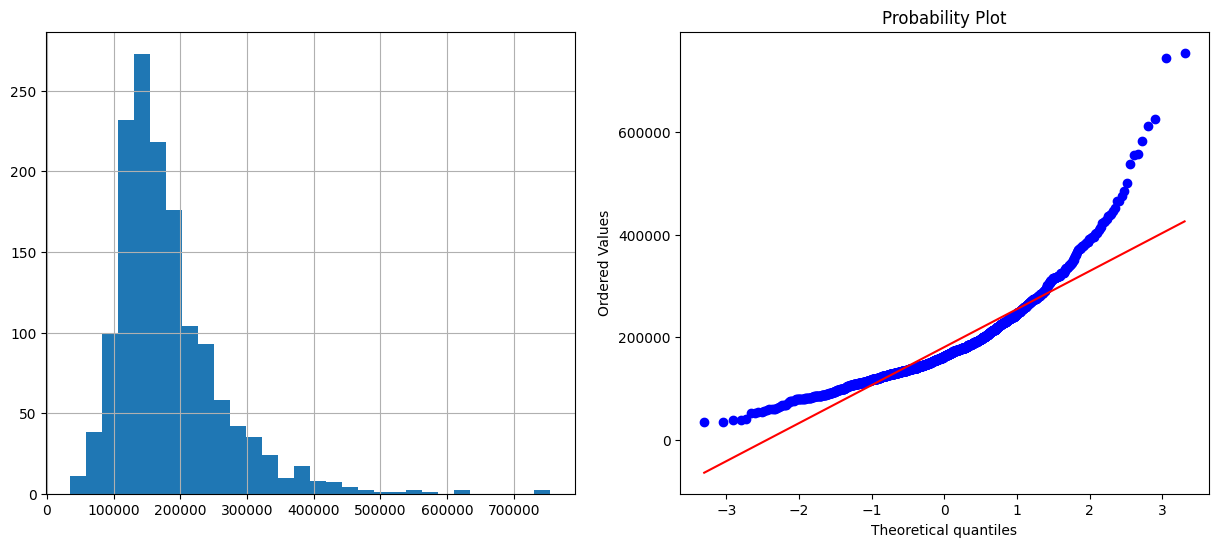

In [217]:
for var in continuas:
    print(var)
    plot_density_qq(dataset,var)

## 2.3 Outliers

Se define la función para el tratamiento de Outliers

In [218]:
def plotDistBoxQQ(dataset,col):
    '''Descripcion:Muestra las graficas de distribucion , Boxplot y Q-QPlot para detectar Outliers
        Input: dataset -> pandas dataframe , col ->string con nombre de columna
        output: visulizacion de 3 plots
        '''
    plt.figure(figsize=(20,6)) 

    plt.subplot(1,3,1)
    sns.distplot(dataset[col],bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title("BoxPlot")

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist="norm",plot=plt)
    plt.title("Q-Q Plot")

C:\Users\peyo8\AppData\Local\Temp\ipykernel_23684\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\peyo8\AppData\Local\Temp\ipykernel_23684\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\peyo8\AppData\Loc

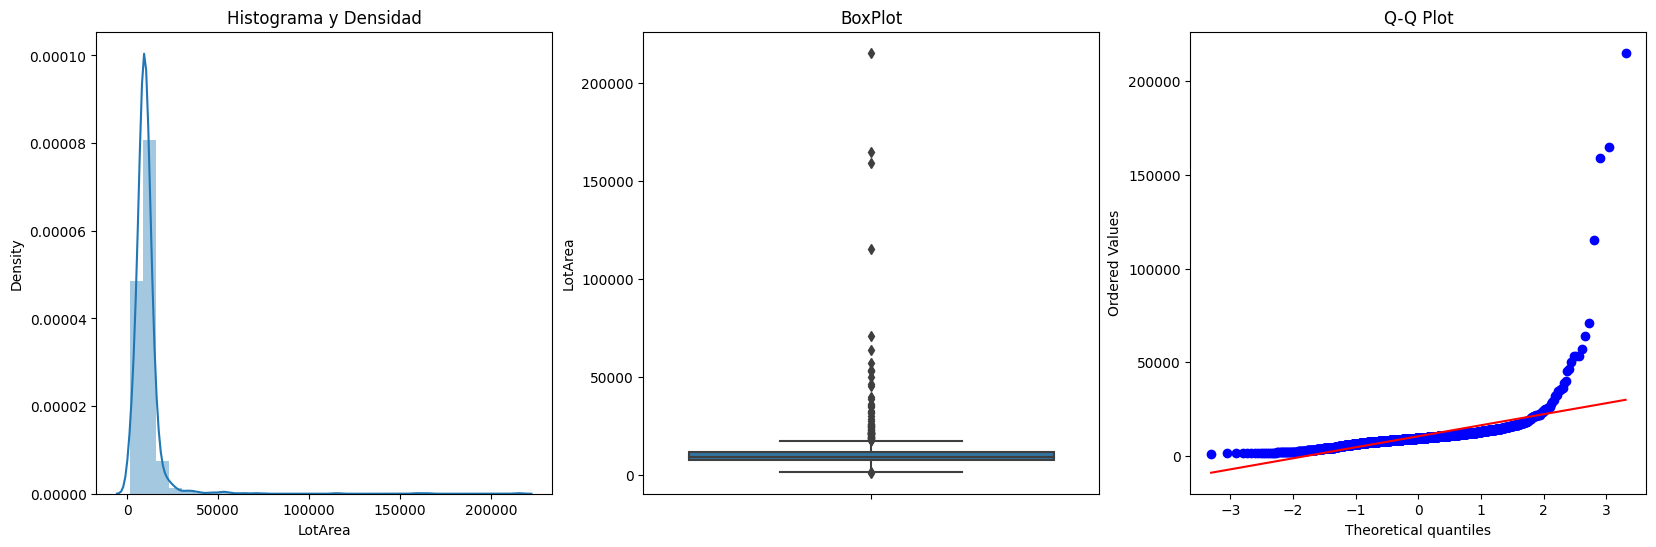

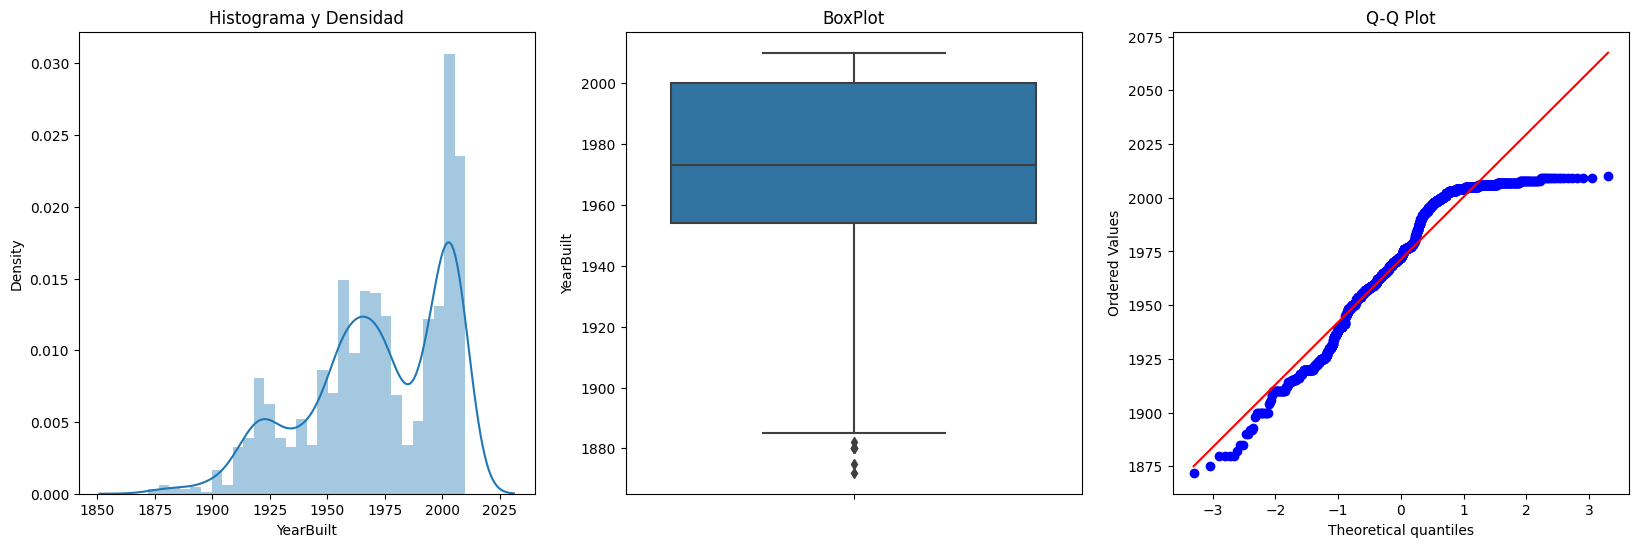

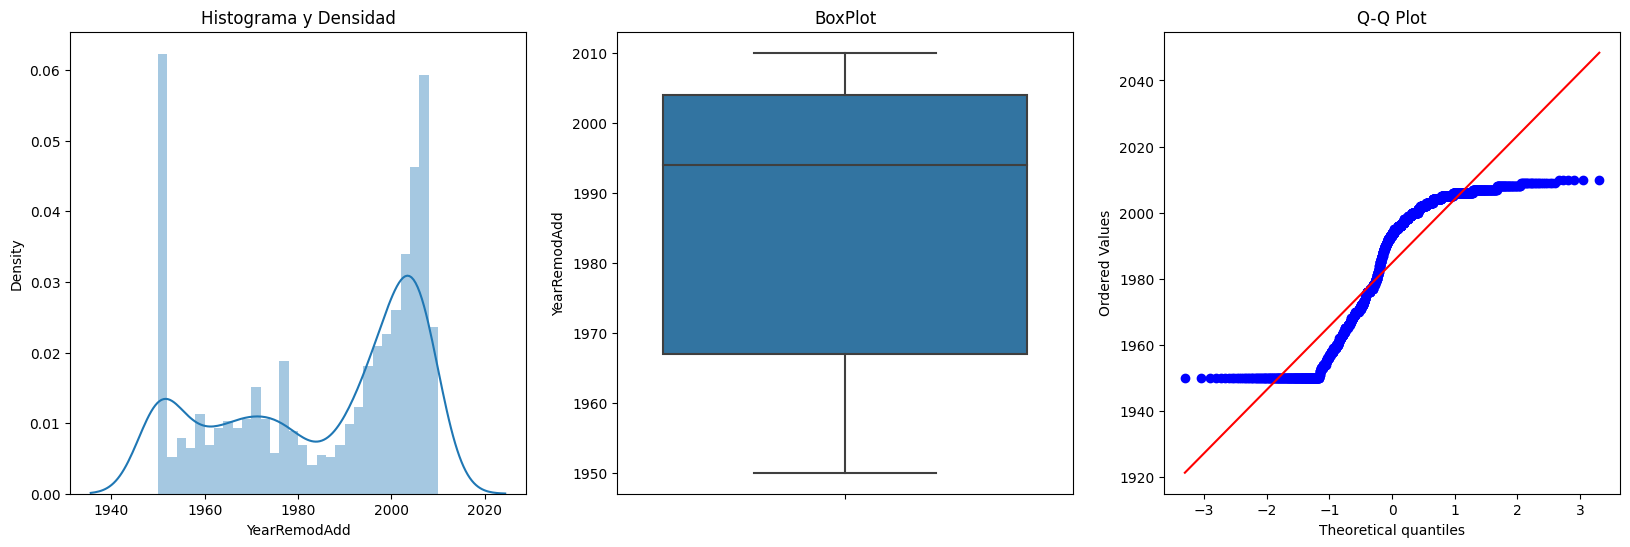

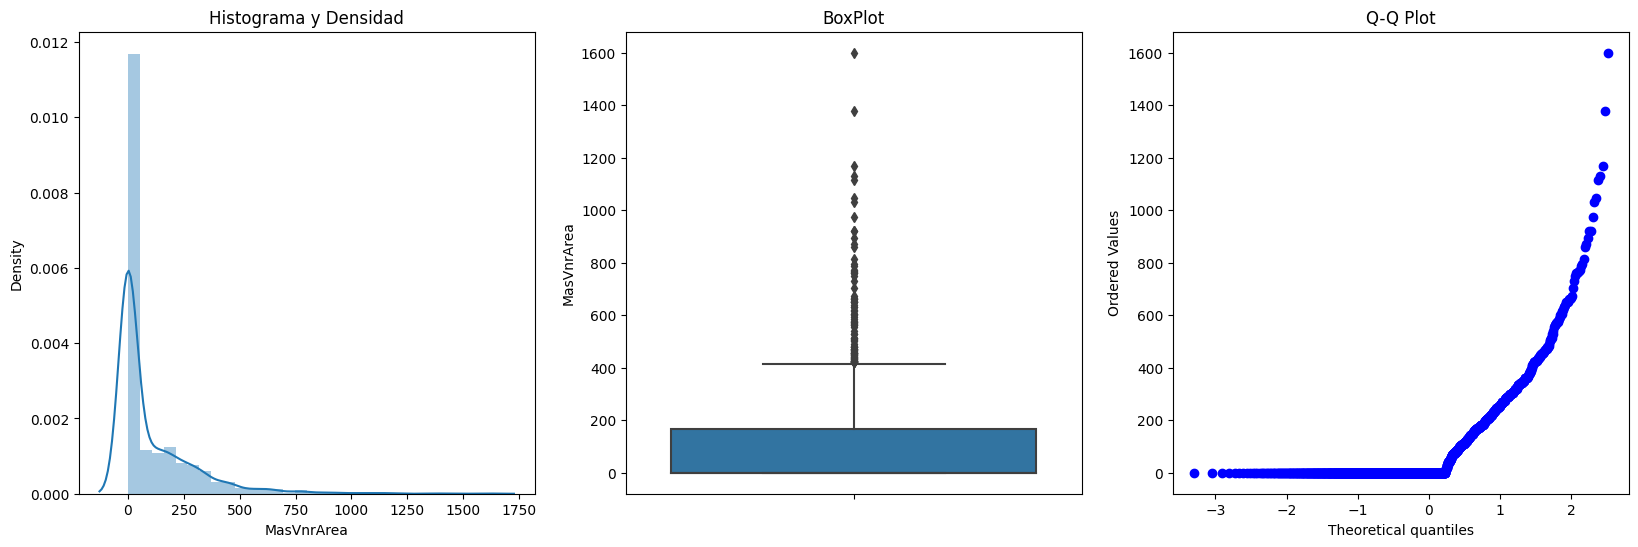

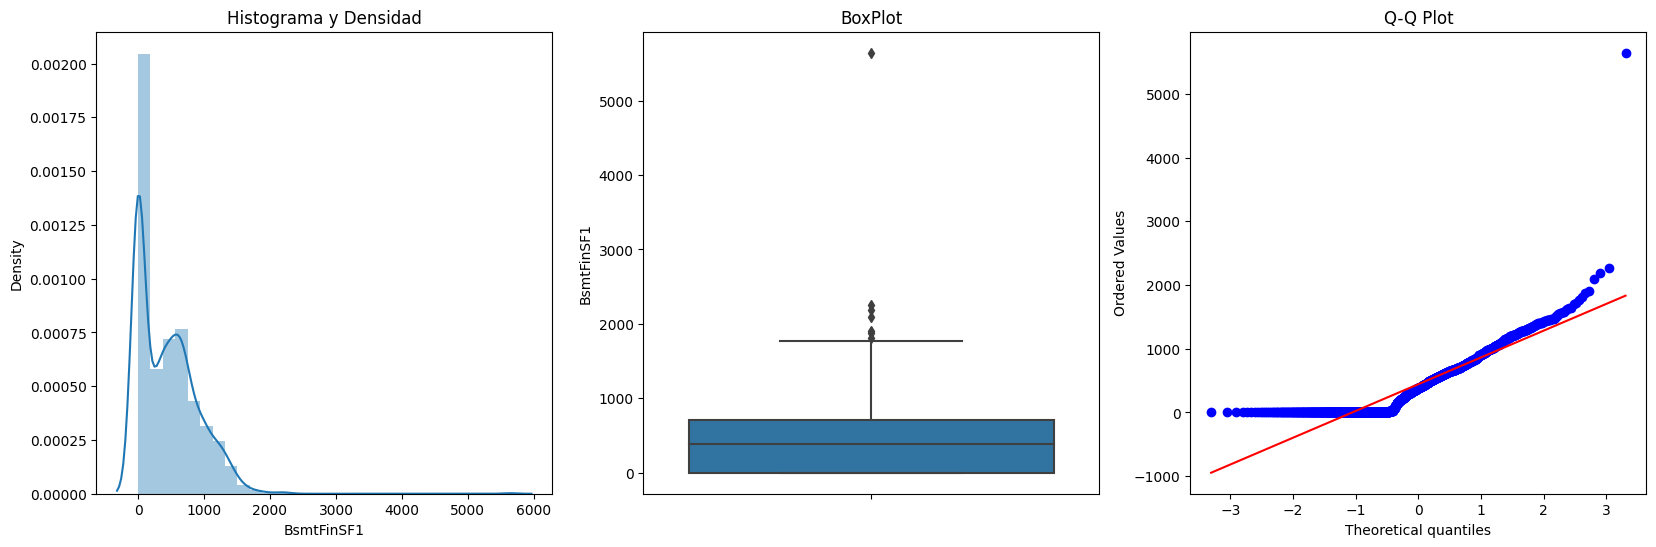

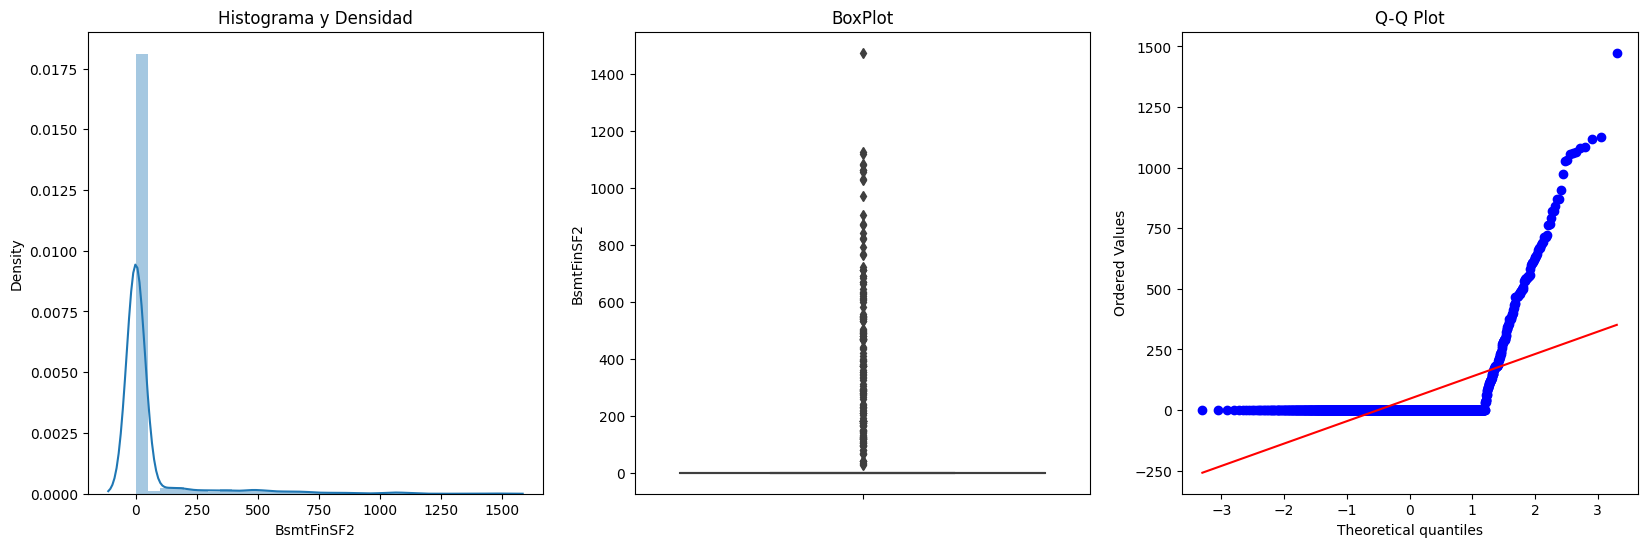

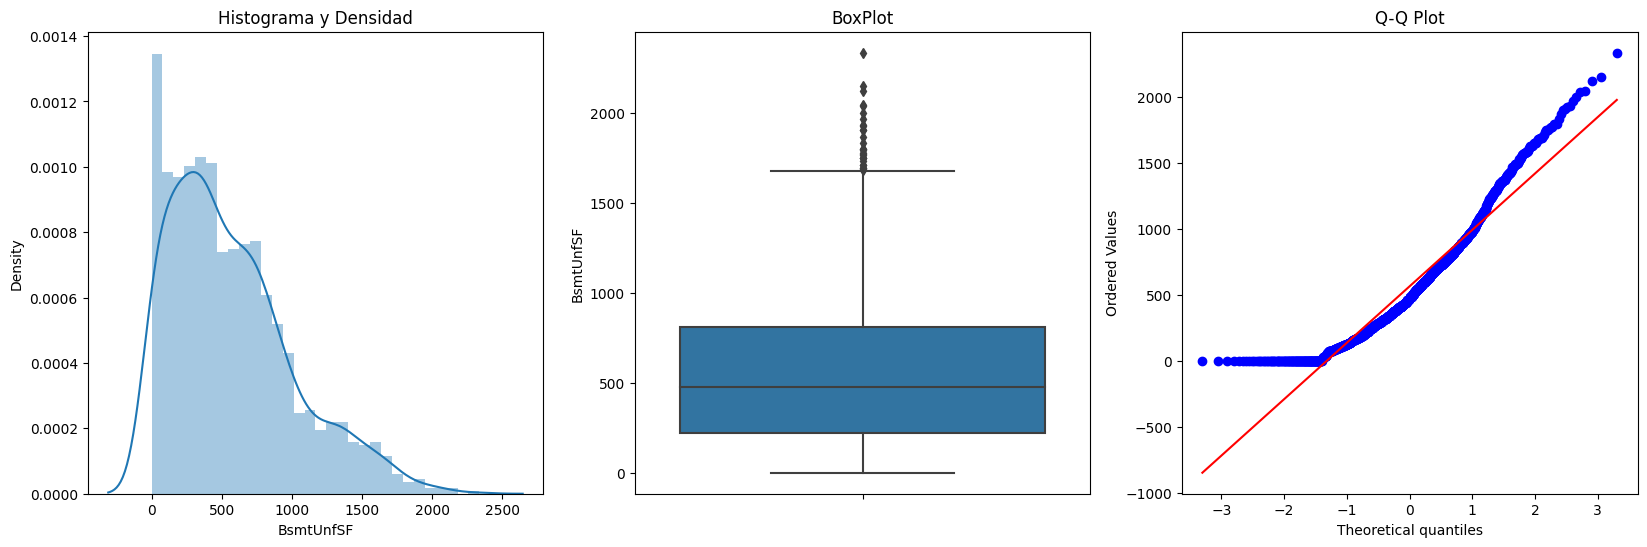

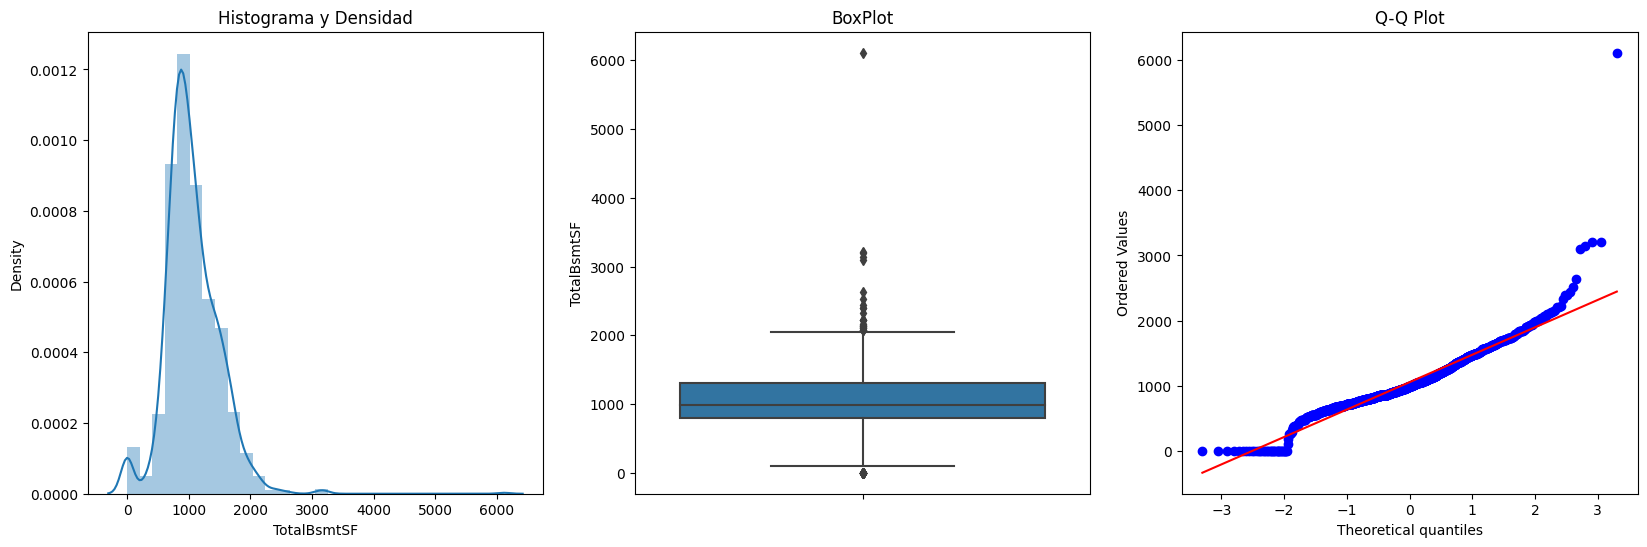

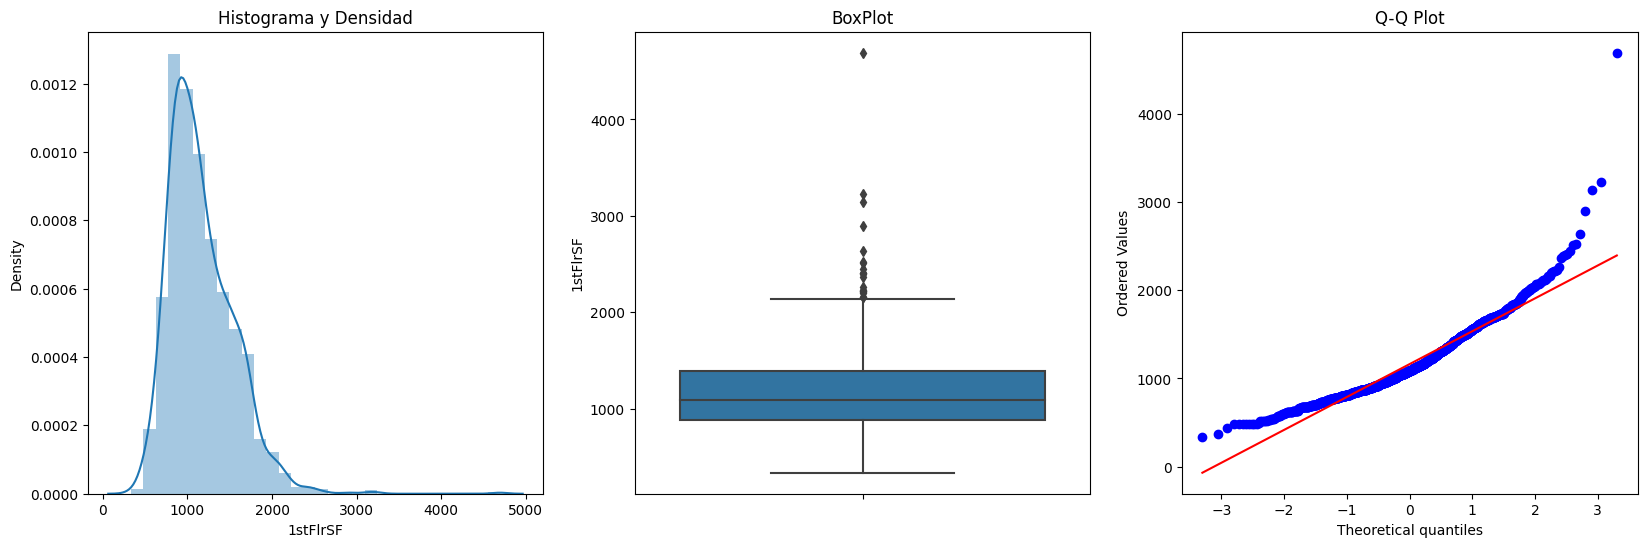

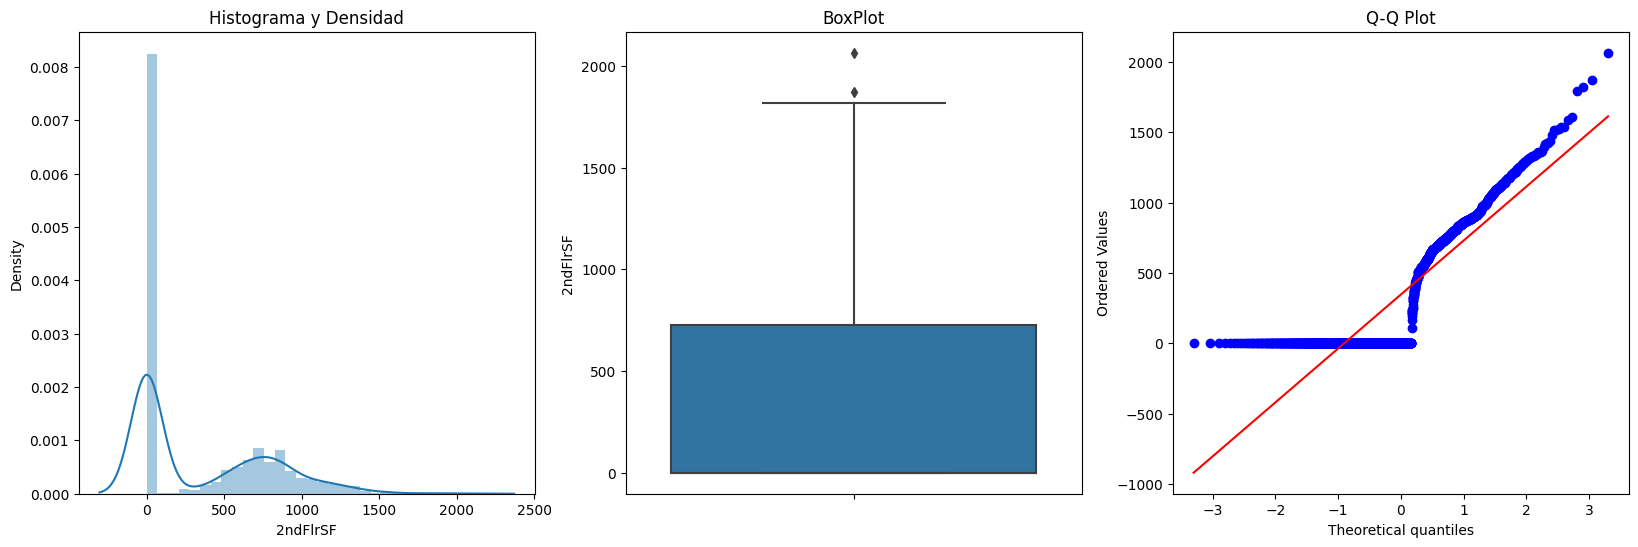

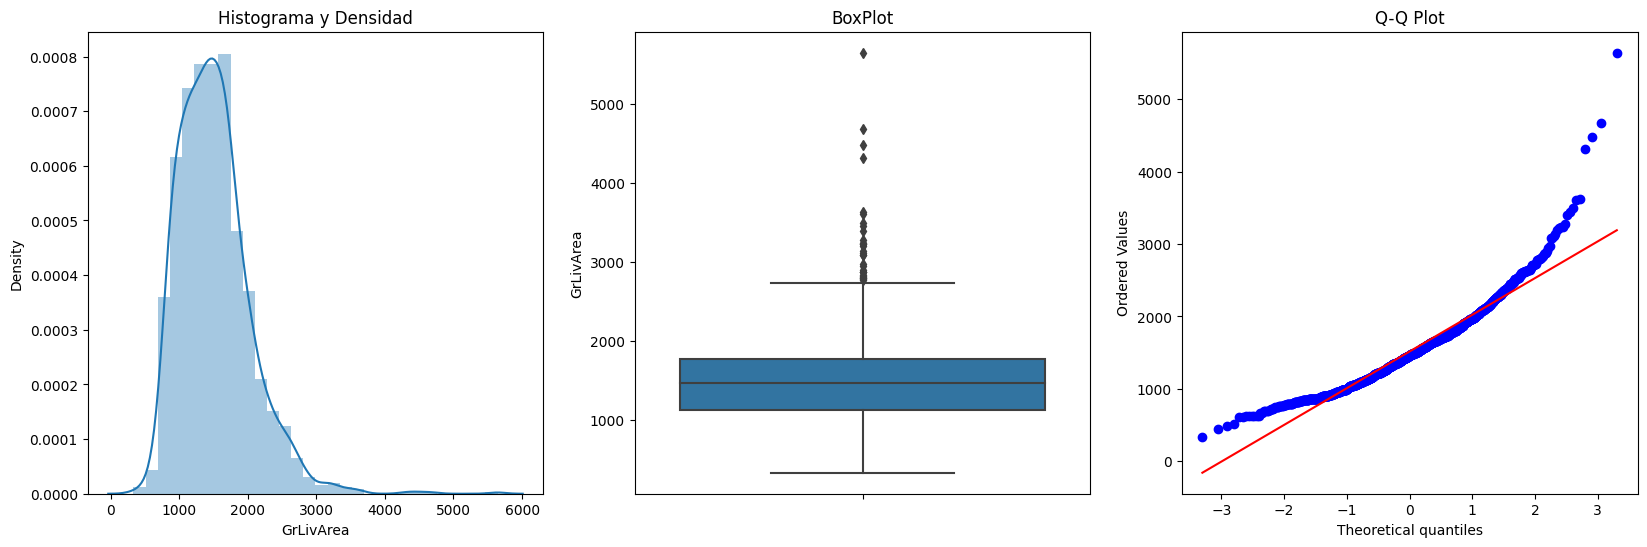

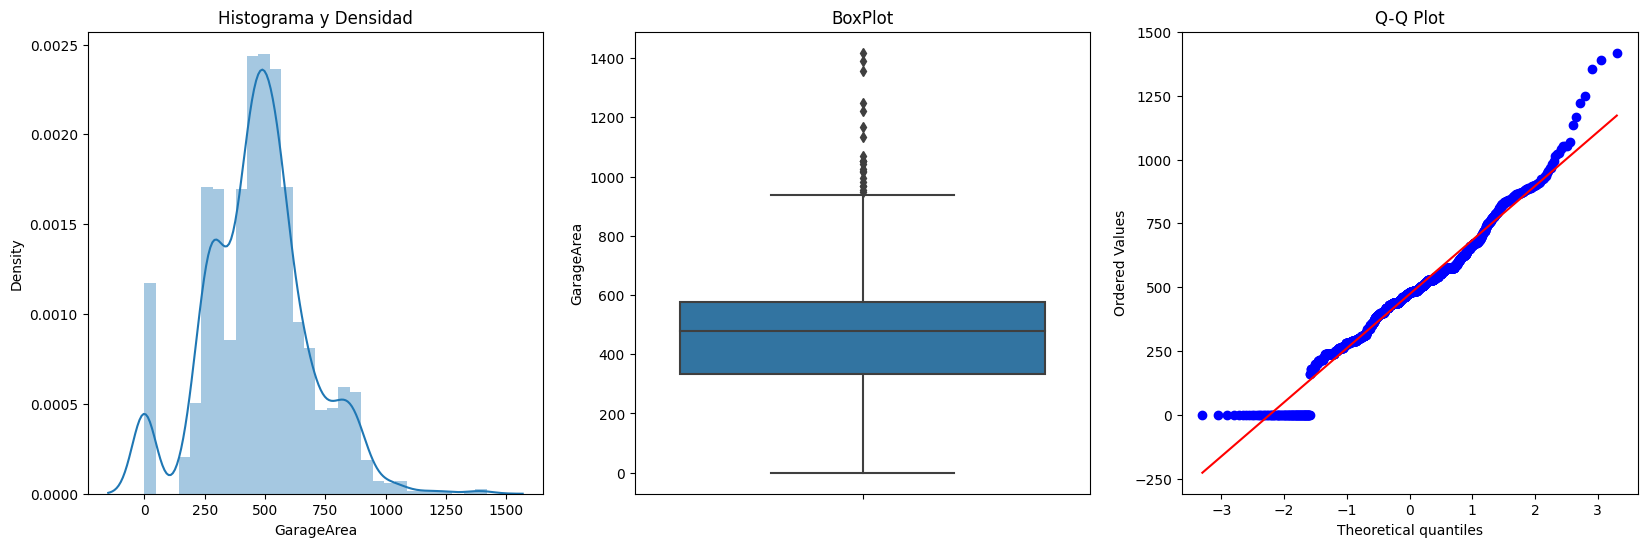

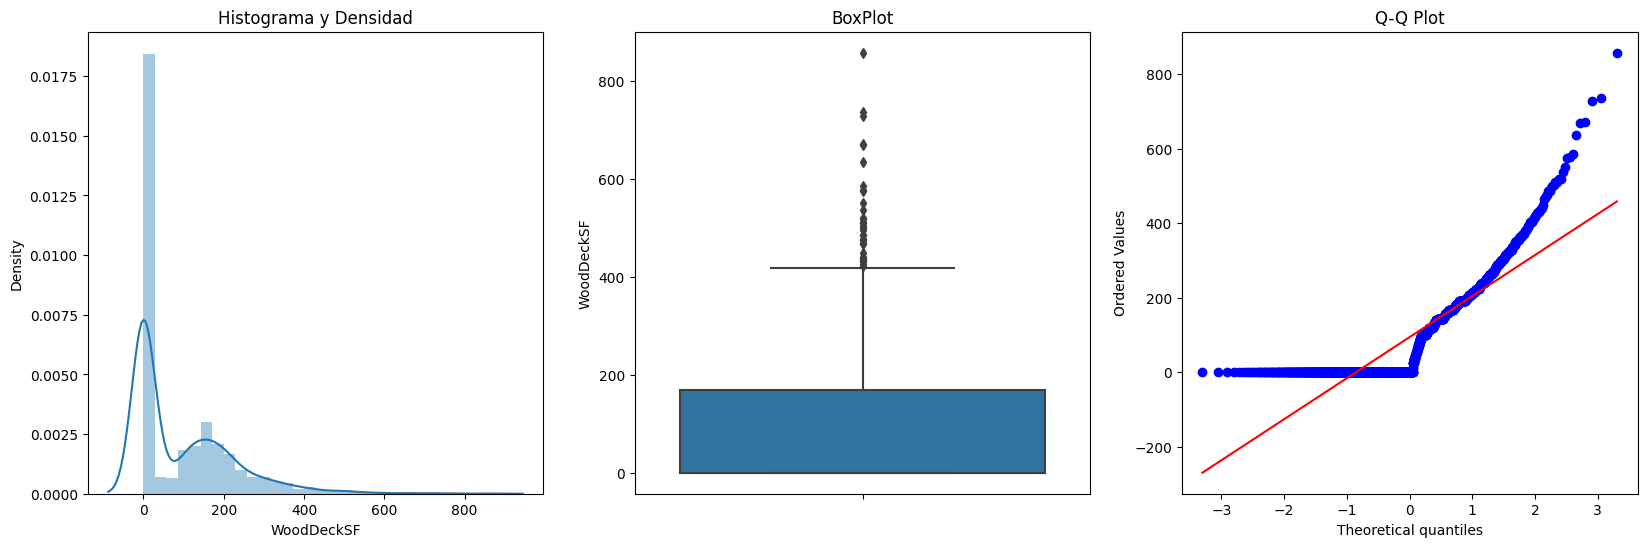

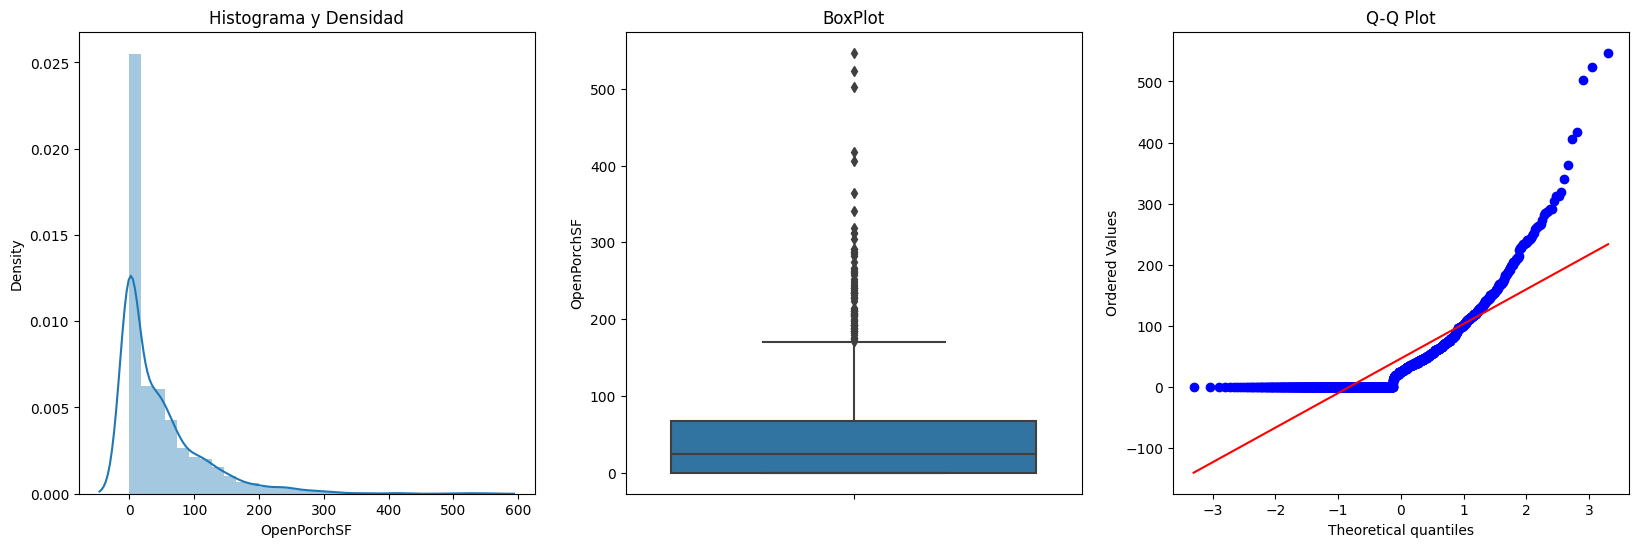

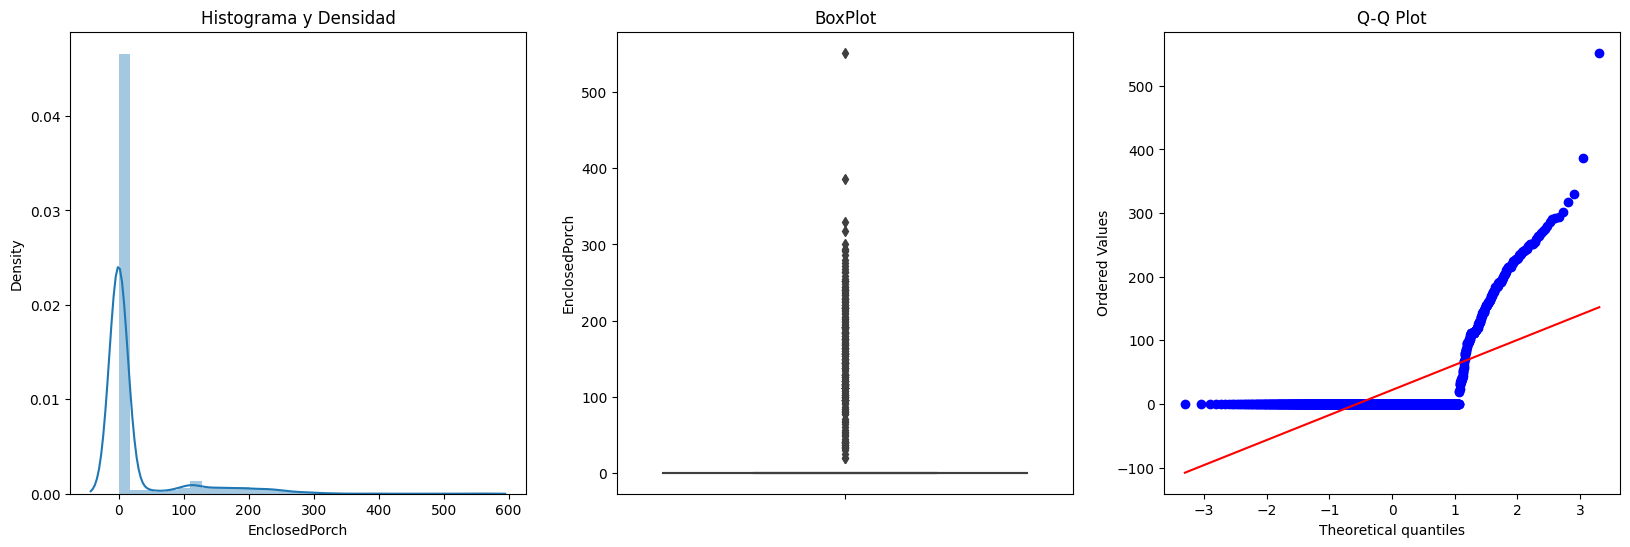

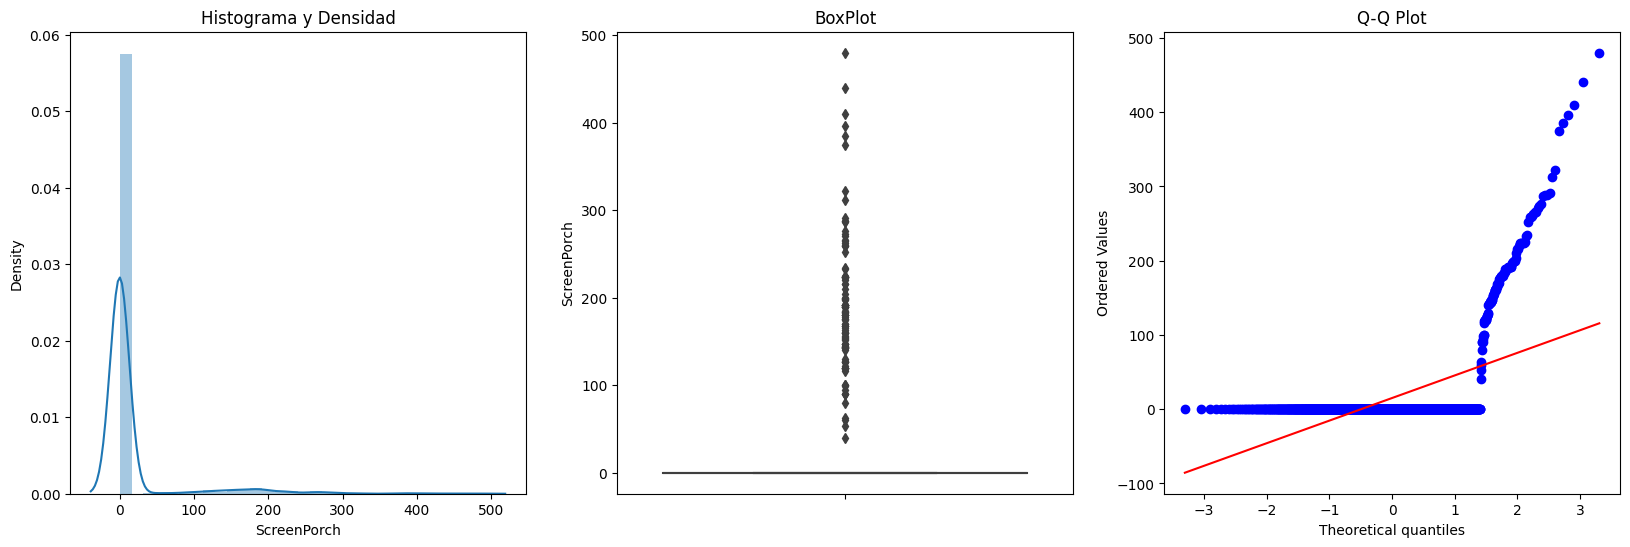

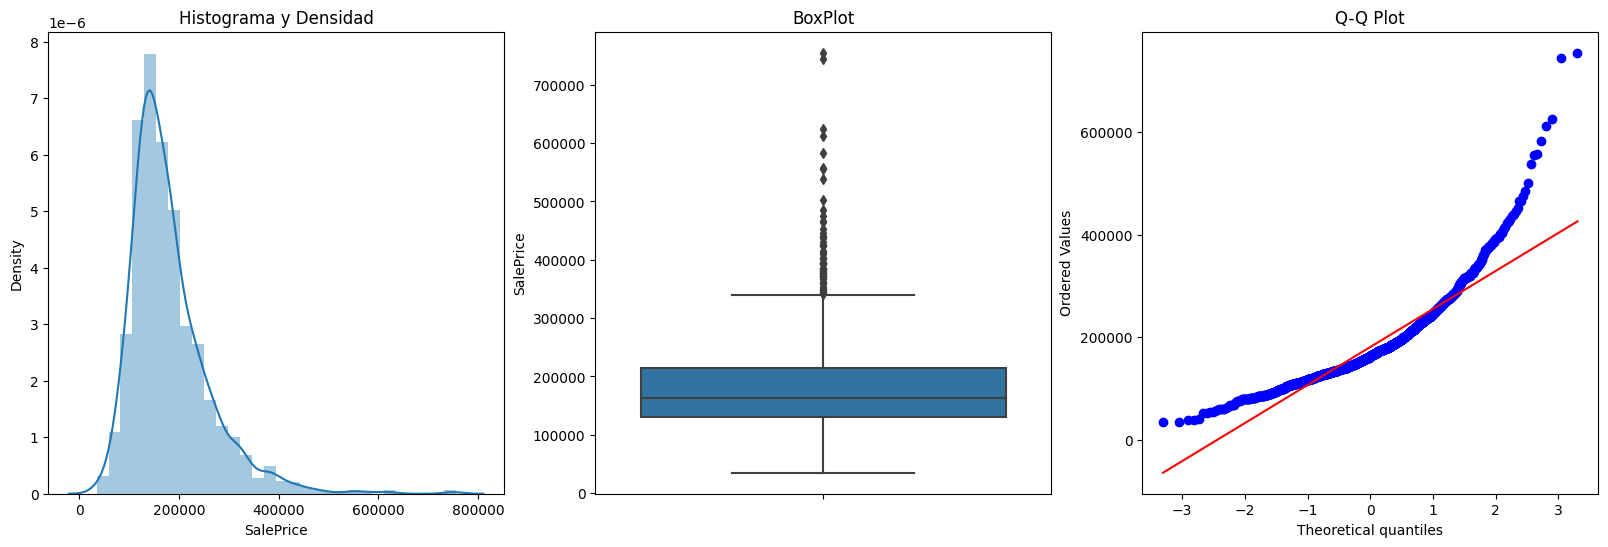

In [219]:
# Graficar para ver Outliers
for col in continuas:
    plotDistBoxQQ(dataset,col)

In [220]:
# Capping para tratamientos de Outliers

# Encontrar IQR, LI y LS de variables continuas para hacer la sustitucion

for col in continuas:
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25) #Q3 - Q1
    LI=dataset[col].quantile(0.25)-(IQR*1.75) #limite inferior
    LS=dataset[col].quantile(0.75)+(IQR*1.75)# limite superior
    if LI<0: #Evitar negativos 
        LI=0
    dataset[col]=np.where(dataset[col]>LS,LS,
                                np.where(dataset[col]<LI ,LI,dataset[col])) ##Sustituir los outliers por los limites

C:\Users\peyo8\AppData\Local\Temp\ipykernel_23684\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\peyo8\AppData\Local\Temp\ipykernel_23684\2820577040.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col],bins=30)
C:\Users\peyo8\AppData\Loc

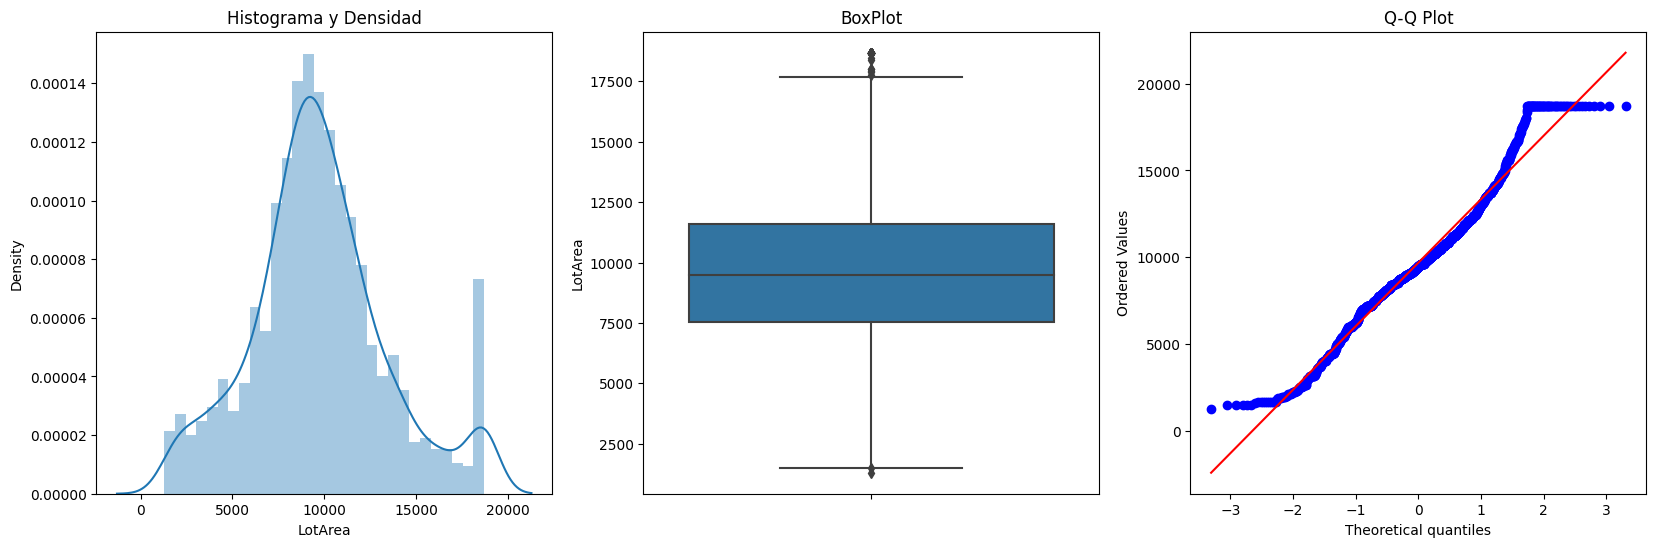

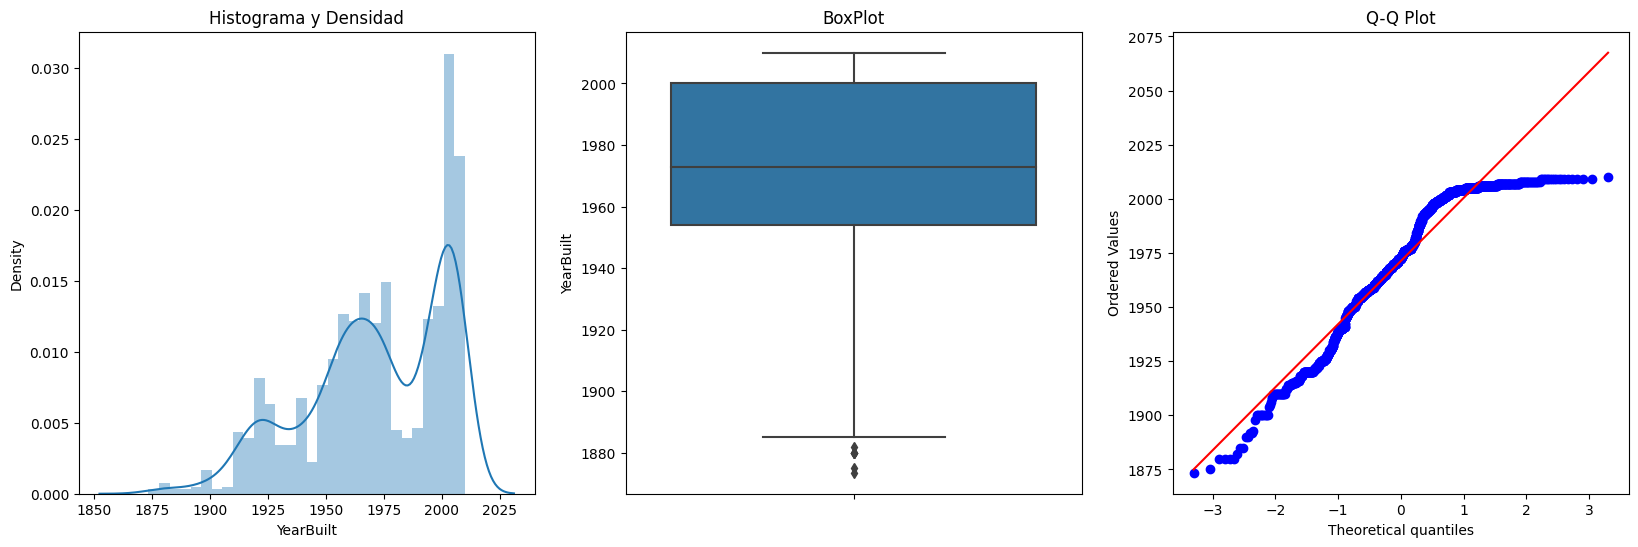

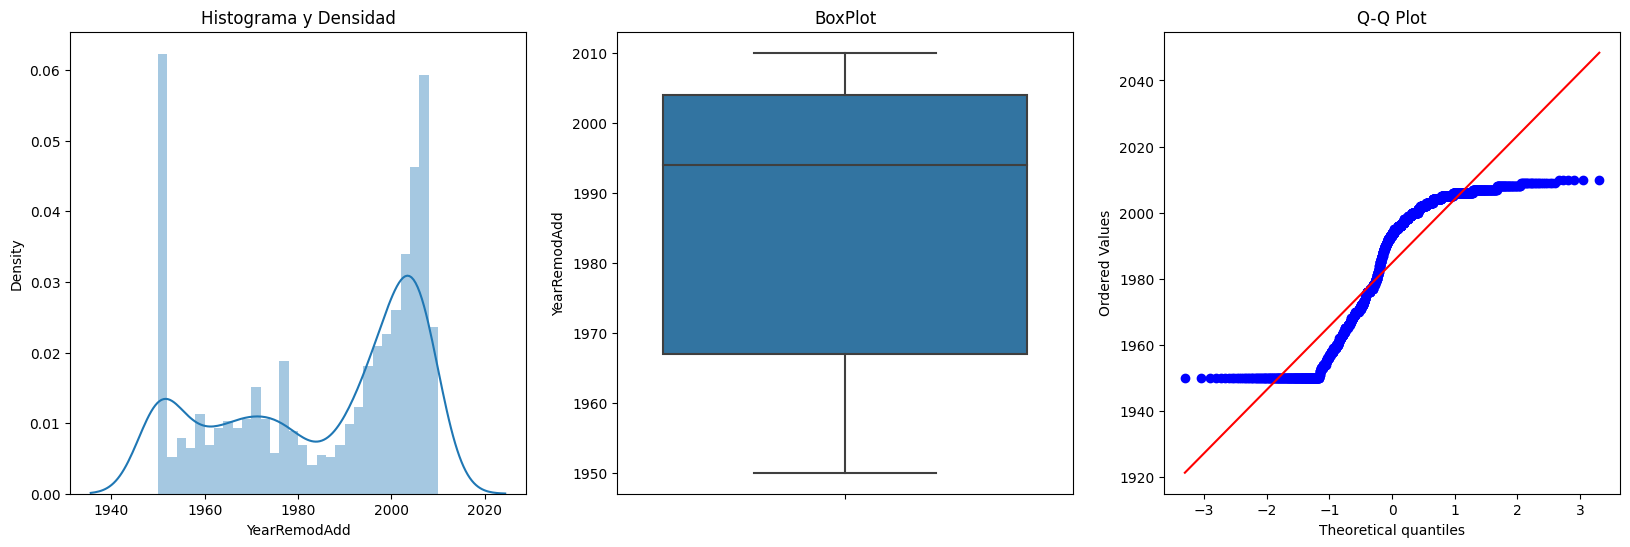

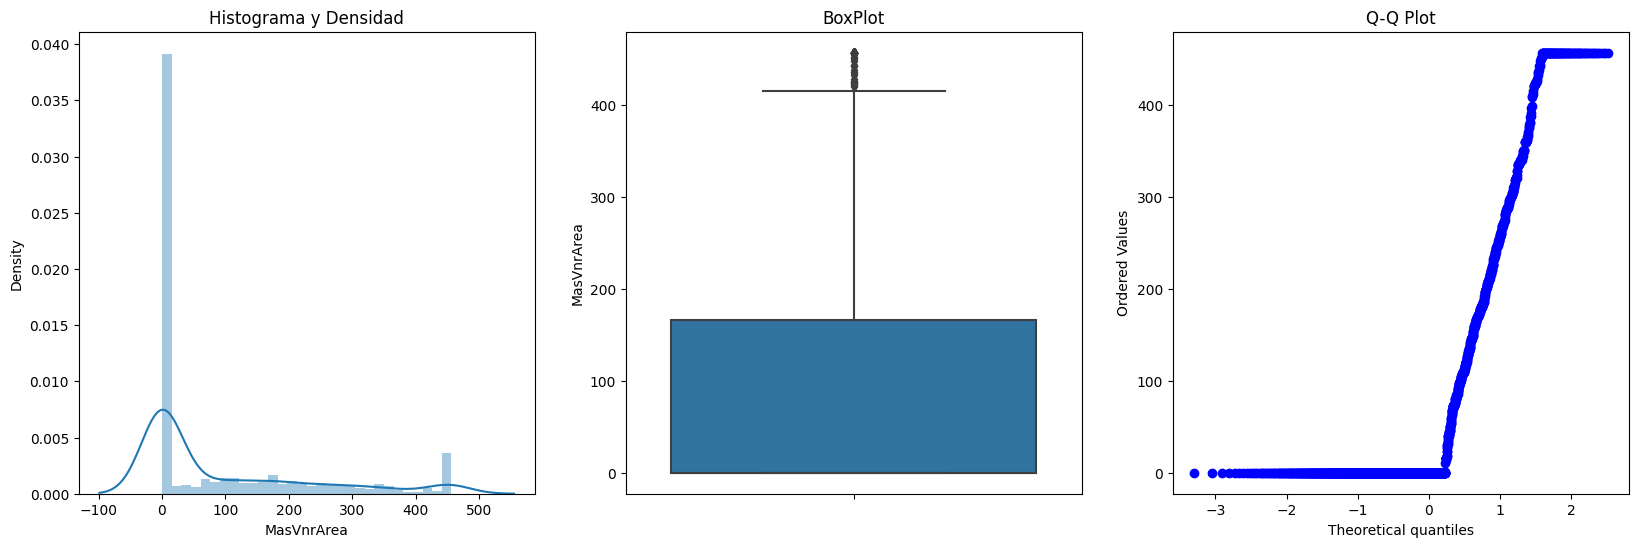

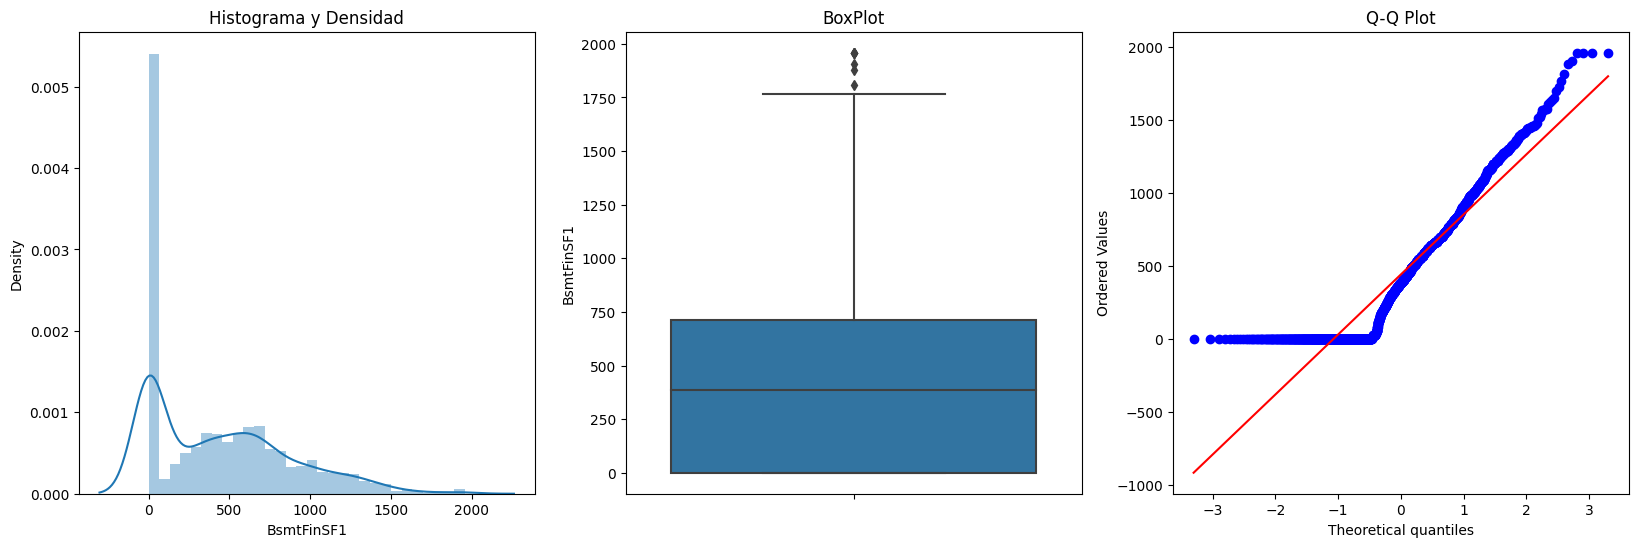

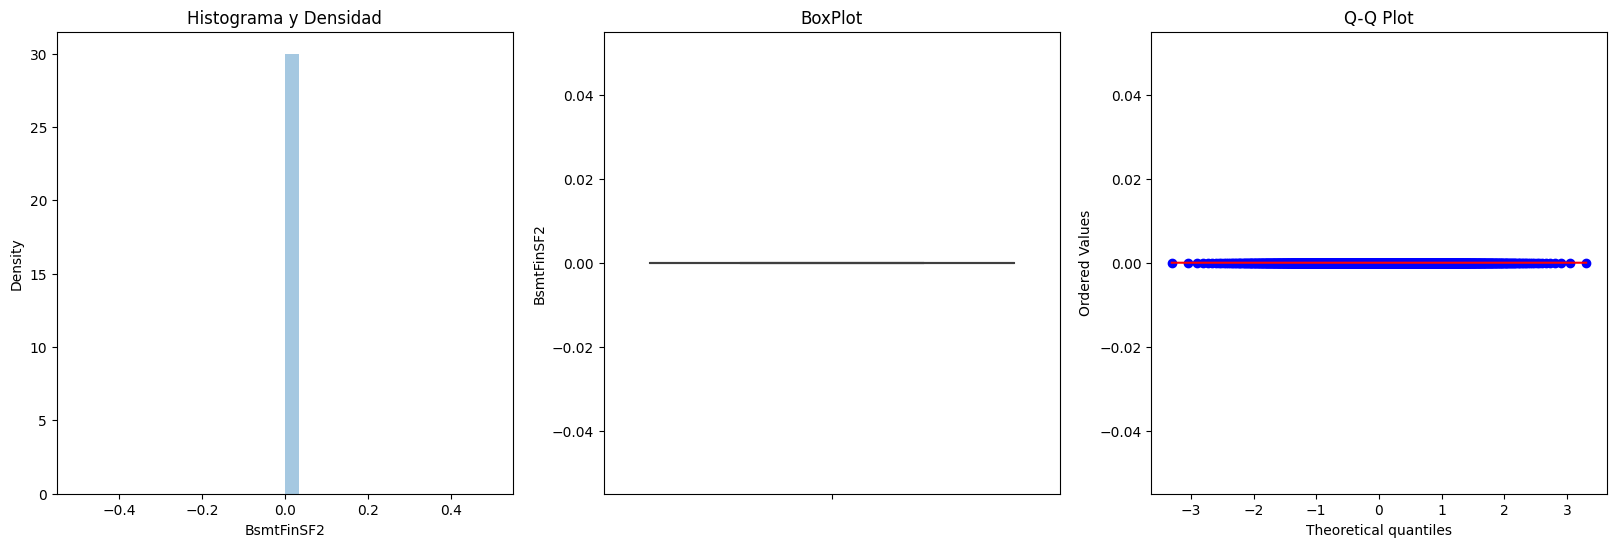

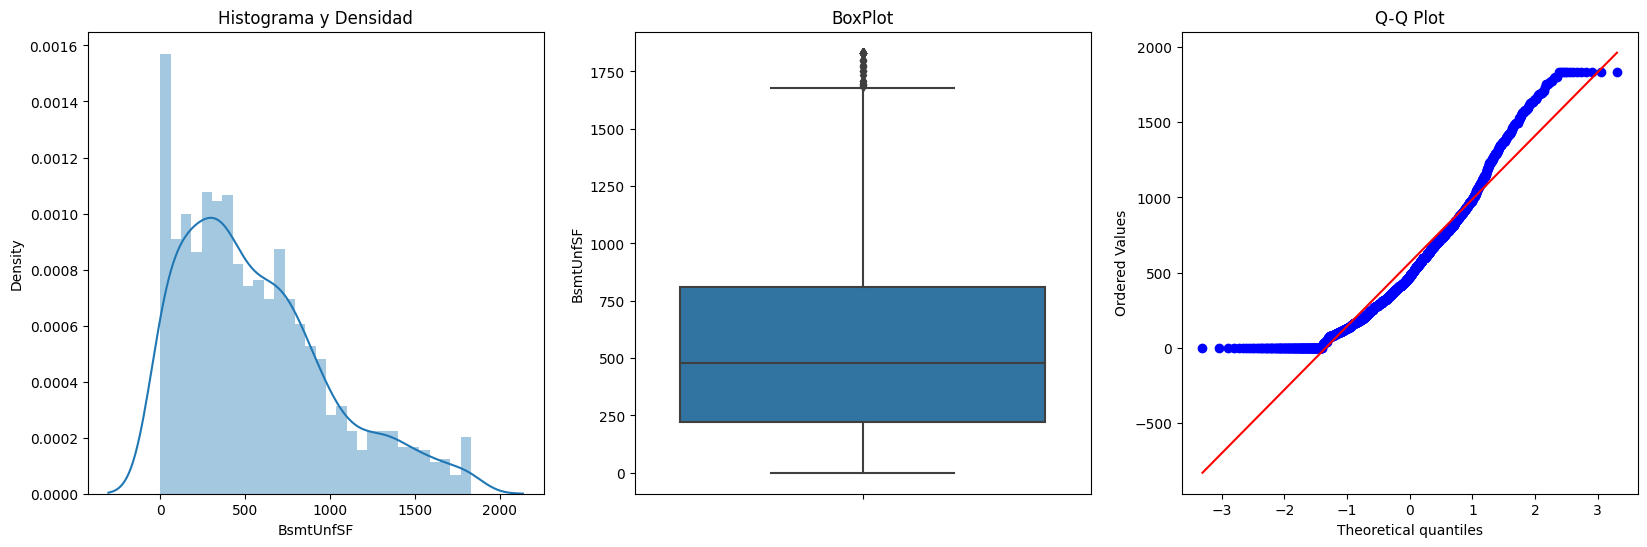

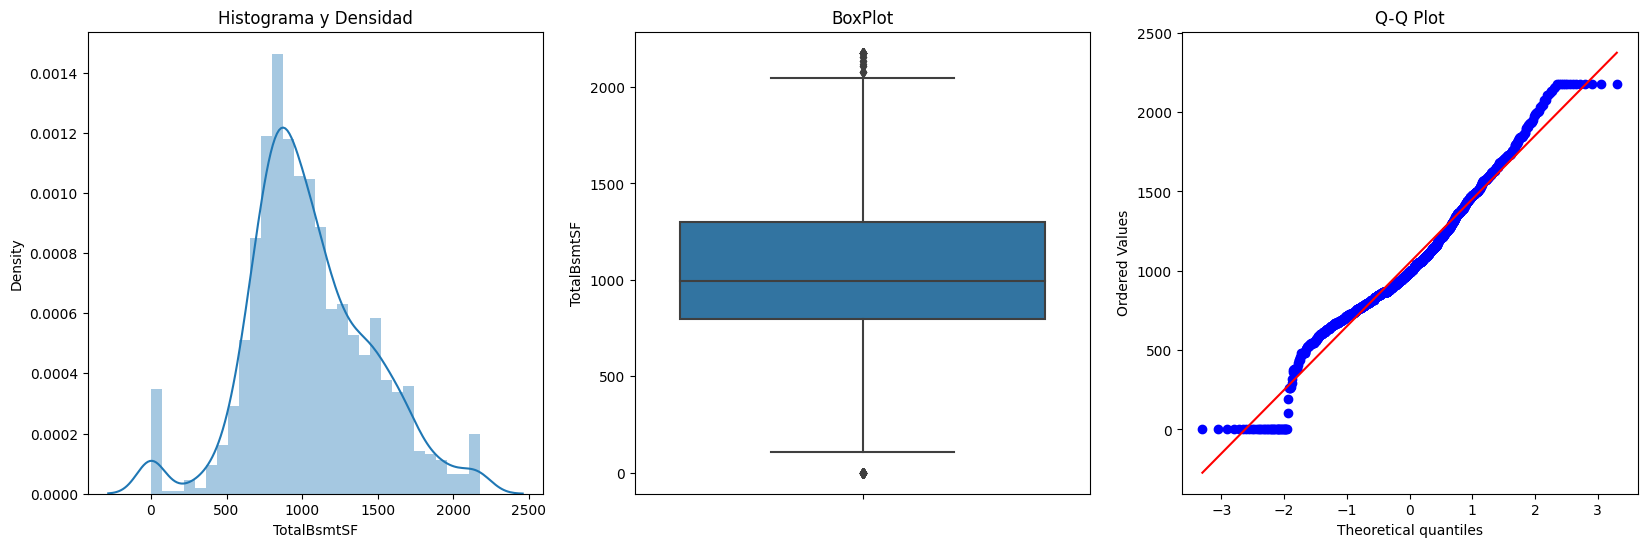

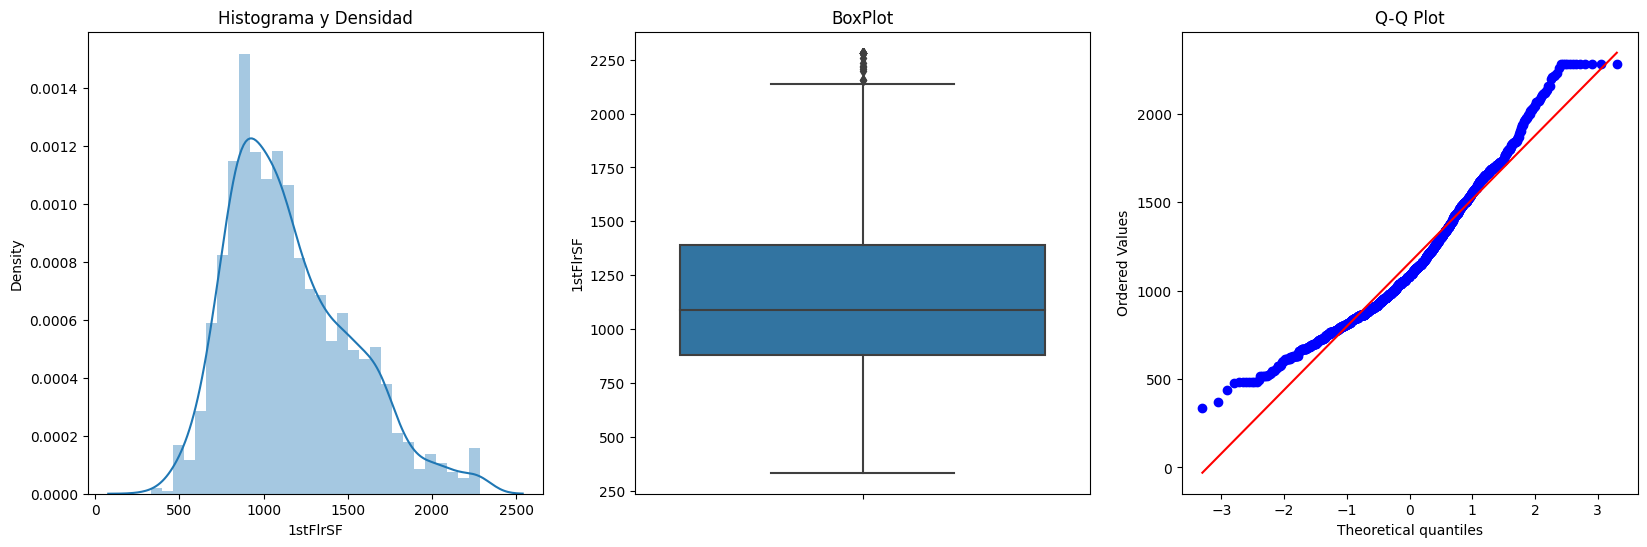

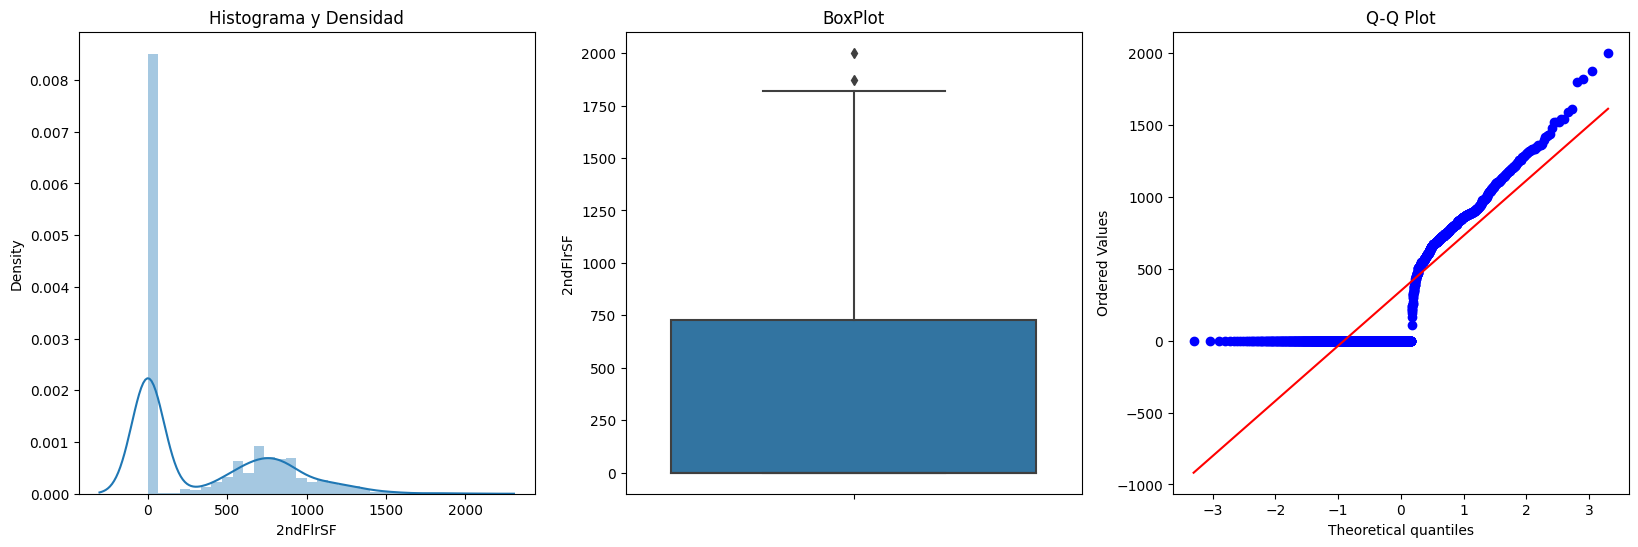

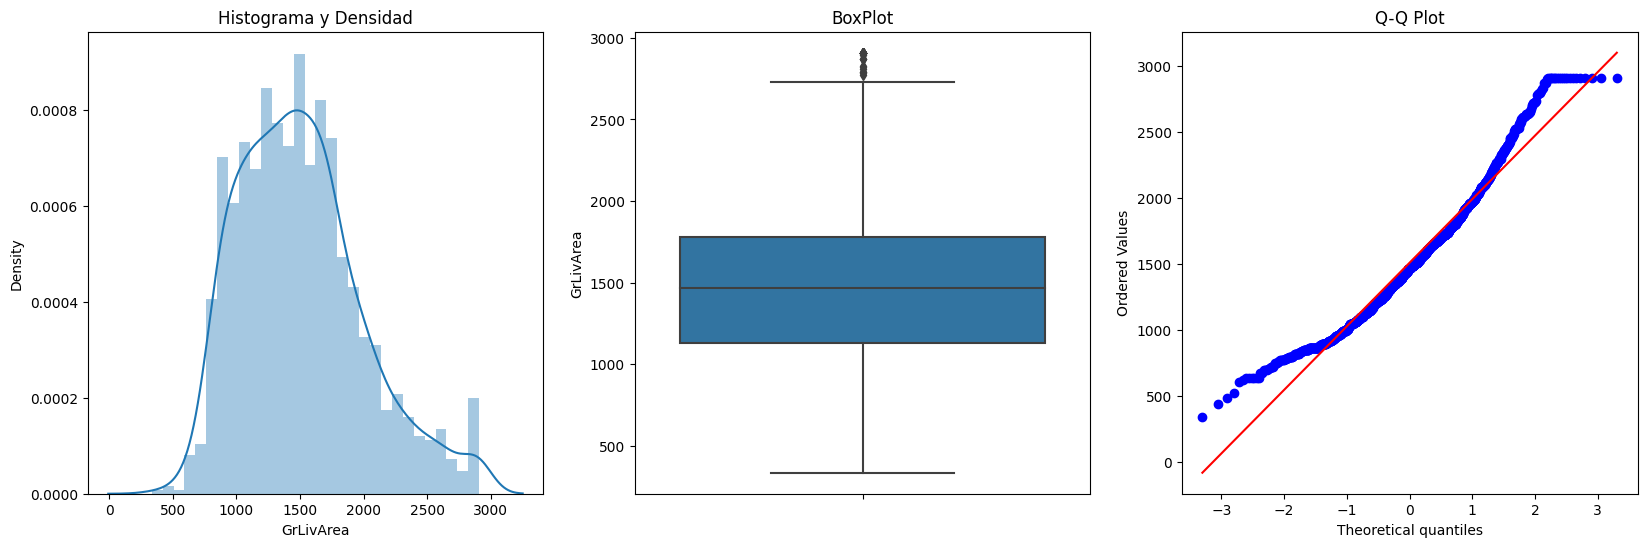

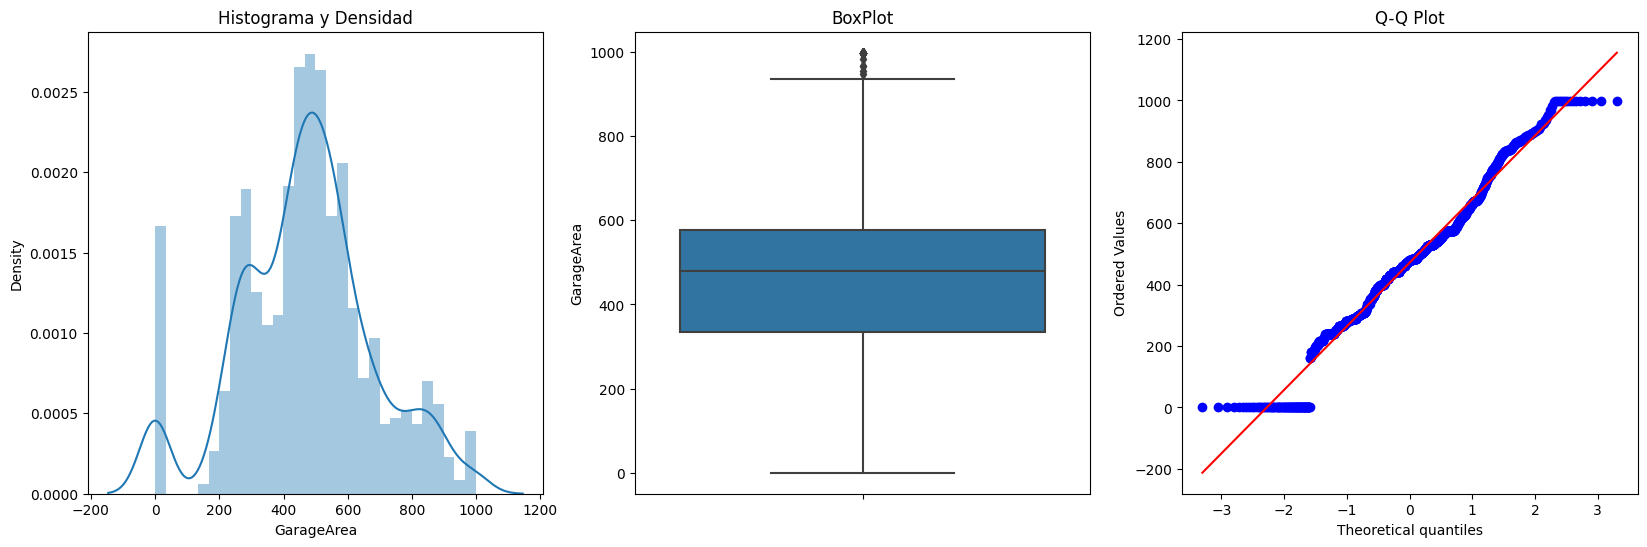

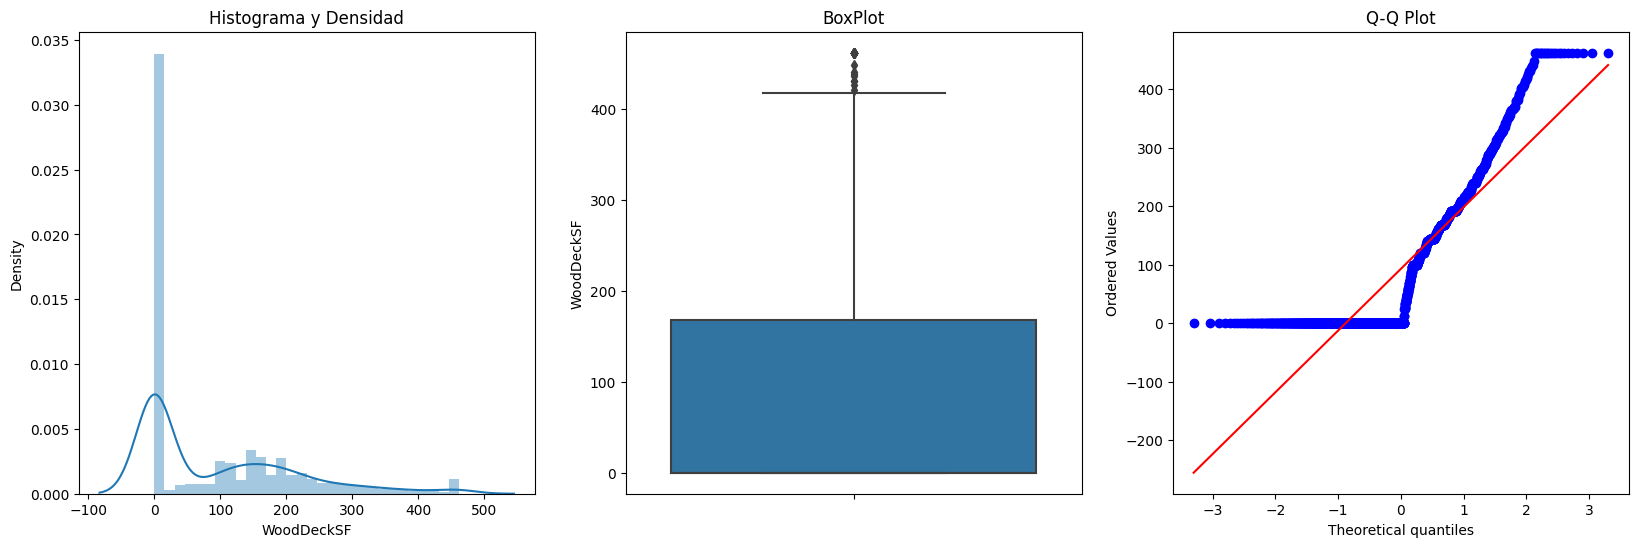

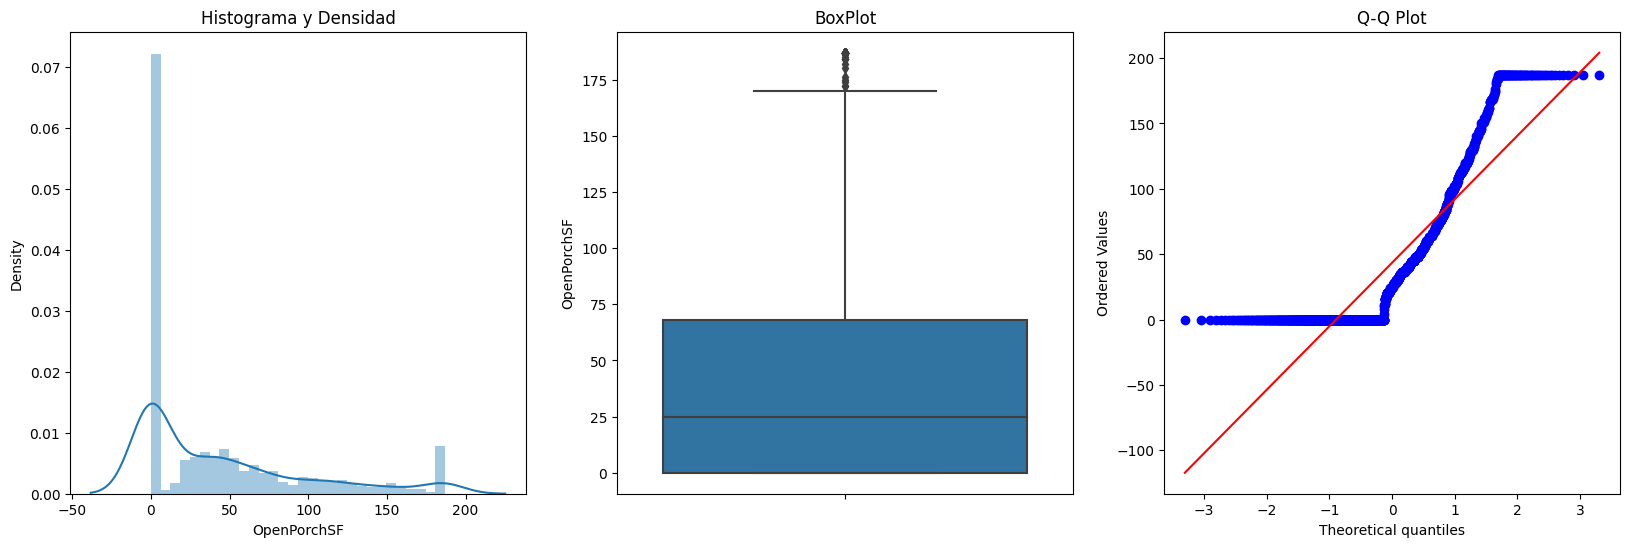

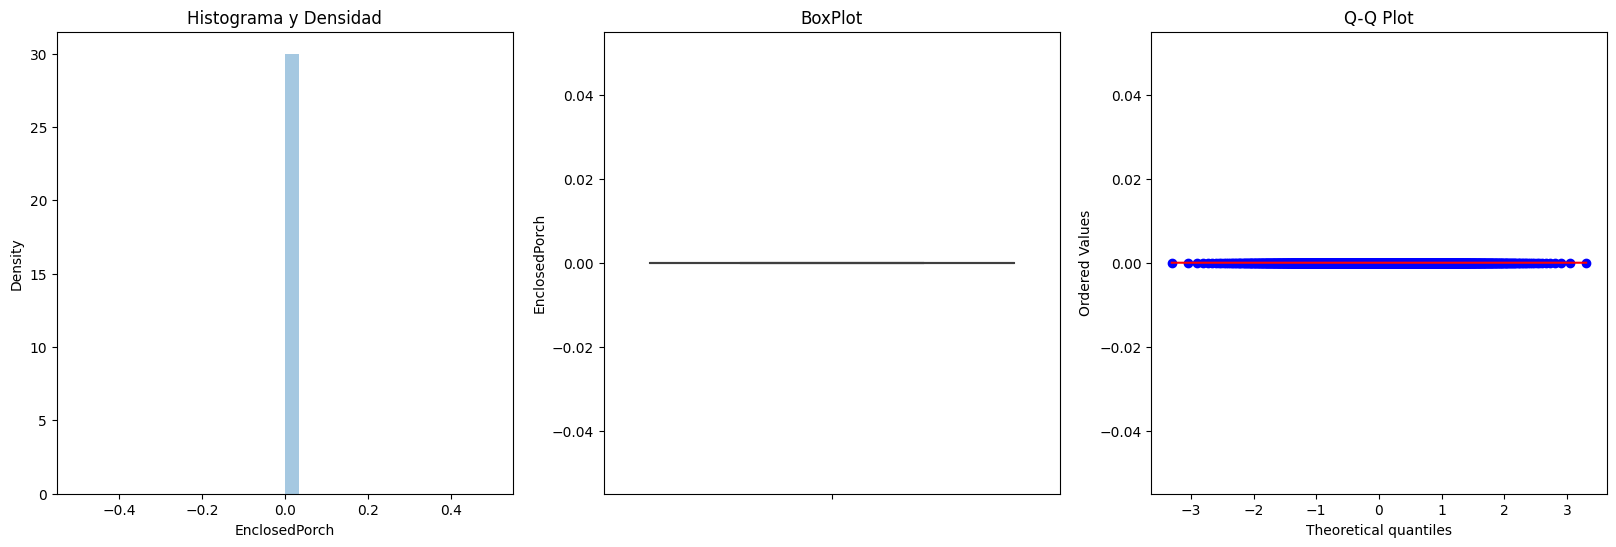

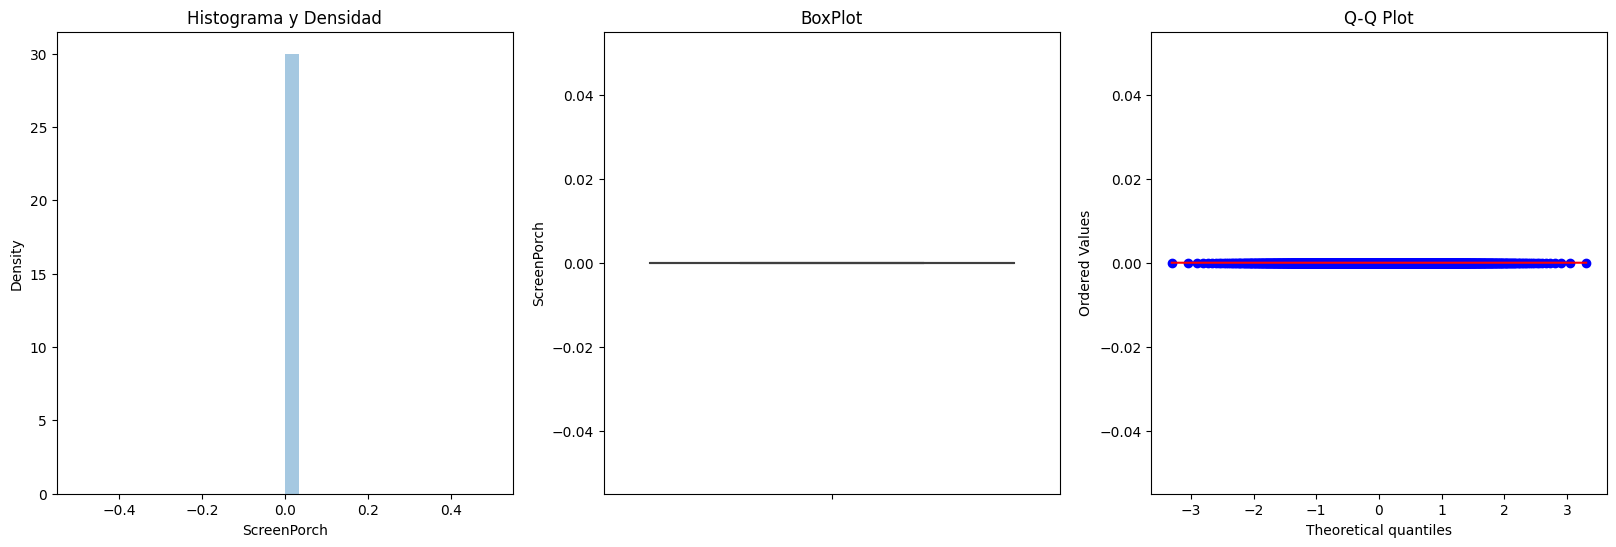

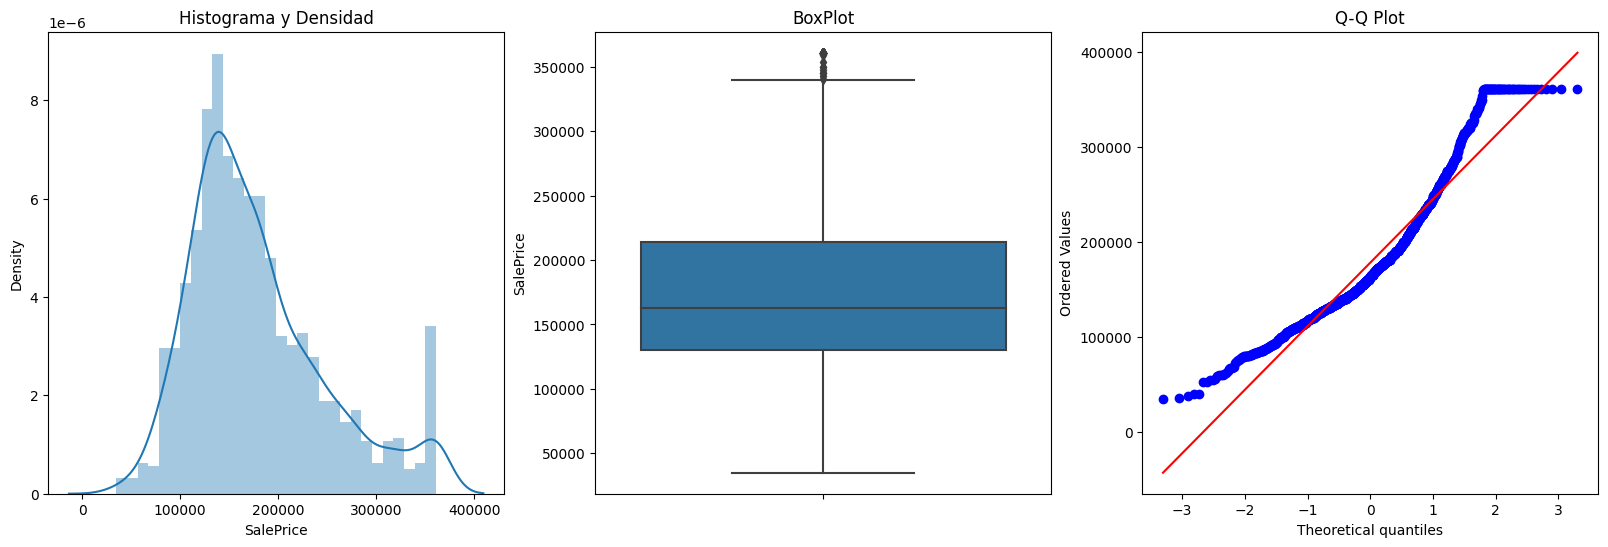

In [221]:
# Graficar para ver el cambio de Outliers
for col in continuas:
    plotDistBoxQQ(dataset,col)

In [223]:
# Aplicar Scaler
scaler=StandardScaler()
scaler.fit(dataset) 


data_scaled=scaler.transform(dataset)
data_scaled=pd.DataFrame(data_scaled,columns=dataset.columns)

In [224]:
## Resumen de la data con scaler
round(data_scaled.describe(),2)

MSSubClass  freq_MSZoning  LotArea  freq_LotShape  freq_LandContour  \
count     1460.00        1460.00  1460.00        1460.00           1460.00   
mean        -0.00           0.00    -0.00           0.00              0.00   
std          1.00           1.00     1.00           1.00              1.00   
min         -0.87          -2.32    -2.27          -2.99             -3.01   
25%         -0.87           0.52    -0.58          -1.07              0.34   
50%         -0.16           0.52    -0.06           0.72              0.34   
75%          0.31           0.52     0.52           0.72              0.34   
max          3.15           0.52     2.43           0.72              0.34   

       freq_LotConfig  freq_Neighborhood  freq_Condition1  freq_Condition2  \
count         1460.00            1460.00          1460.00          1460.00   
mean            -0.00              -0.00            -0.00            -0.00   
std              1.00               1.00             1.00             1.00   
min             -2.09              -1.53            -2.63            -9.83   
25%             -1.42              -0.76             0.40             0.10   
50%              0.62              -0.33             0.40             0.10   
75%              0.62               0.79             0.40             0.10   
max              0.62               1.96             0.40             0.10   

       freq_BldgType  ...  ohe_PavedDrive_N  ohe_PavedDrive_P  \
count        1460.00  ...           1460.00           1460.00   
mean           -0.00  ...              0.00              0.00   
std             1.00  ...              1.00              1.00   
min            -2.36  ...             -0.26             -0.14   
25%             0.44  ...             -0.26             -0.14   
50%             0.44  ...             -0.26             -0.14   
75%             0.44  ...             -0.26             -0.14   
max             0.44  ...              3.90              6.90   

       ohe_PavedDrive_Y  BsmtFinSF1_transformada  BsmtFinSF2_transformada  \
count           1460.00                  1460.00                  1460.00   
mean               0.00                    -0.00                    -0.00   
std                1.00                     1.00                     1.00   
min               -3.34                    -1.34                    -0.36   
25%                0.30                    -1.34                    -0.36   
50%                0.30                     0.42                    -0.36   
75%                0.30                     0.81                    -0.36   
max                0.30                     2.61                     2.78   

       2ndFlrSF_transformada  WoodDeckSF_transformada  \
count                1460.00                  1460.00   
mean                    0.00                    -0.00   
std                     1.00                     1.00   
min                    -0.87                    -0.95   
25%                    -0.87                    -0.95   
50%                    -0.87                    -0.95   
75%                     1.14                     1.04   
max                     1.35                     1.57   

       OpenPorchSF_transformada  EnclosedPorch_transformada  \
count                   1460.00                     1460.00   
mean                       0.00                       -0.00   
std                        1.00                        1.00   
min                       -1.06                       -0.41   
25%                       -1.06                       -0.41   
50%                        0.38                       -0.41   
75%                        0.89                       -0.41   
max                        1.96                        2.46   

       ScreenPorch_transformada  
count                   1460.00  
mean                       0.00  
std                        1.00  
min                       -0.29  
25%                       -0.29  
50%                       -0.29  
7

## 2.4 Separación train test

Se procede a realizar la separación del dataset entre train y test asegurando la reproducibilidad del experimento

In [227]:
train_set = dataset.sample(frac=0.8, random_state=2023) 
test_set = dataset.drop(train_set.index) 
train_set.shape, test_set.shape

((1168, 83), (292, 83))